<a href="https://colab.research.google.com/github/catastropiyush/chocos/blob/main/Computational_Sciences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python/FORTRAN/C++ Material** \\
*If you find anything useful put the links here in this box* \\
https://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html \\
https://www.johndcook.com/blog/2020/02/02/stiff-differential-equations/  \\
https://github.com/lukepolson/youtube_channel/tree/main/Python%20Tutorial%20Series  \\
https://www.cs.toronto.edu/~jlucas/teaching/csc411/lectures/lec10_handout.pdf \\

https://www.pdfdrive.com/numerical-methods-of-mathematics-implemented-in-fortran-e190128359.html \\

https://web.mat.bham.ac.uk/R.W.Kaye/numerics/2npcontents.html \\

MC integration
https://www.mv.helsinki.fi/home/rummukai/simu/random.pdf \\

Computational Physics
https://github.com/mhjensen

In [ ]:
DFT book Errol G. Lewars (For clearing the concepts of DFT you can refer the this book. It has contents that are explained in easy language. If you have time then you can read, if not then it will be ok)


***If you add a code or do a correction put your name here and also in the code itself***

### Contributors: **Piyush**  **Aditya**   **Nirmalya** **Dhananjay** **Ananya** **Surabhi** **Pranjal** **Arpita** **Jay**

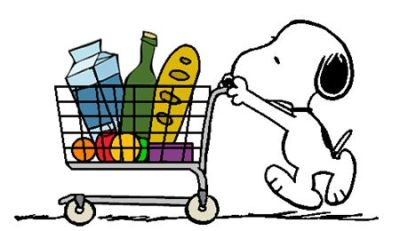

***Ji Bhar Ke Dekh Lijiye in code Ko Karib Se,
Phir Aap Ke Nasib Mein Ye code Ho Na Ho***

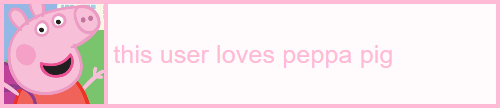

In [ ]:
%%html
<marquee style='width: 96%; color: deeppink;'><b>Physically I'm here but mentally I'm lying in the field of flowers.</b></marquee>

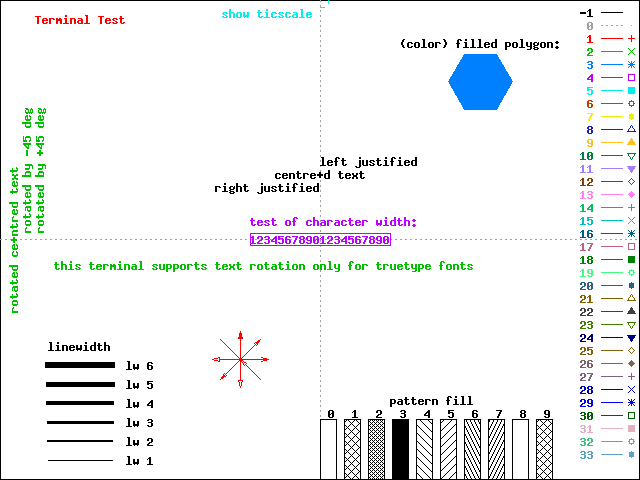

#**Contents**
1.   **Molecular Simulations**
2.   **Computational Methods**
3.   **Machine Learning**
4.   **Electronic Structure Theory**
5.   **Astrophysics**
6.   **Atomic and Molecular Spectroscopy**
7.   *Add your own fav topic*



# **Molecular Simulations**

In [ ]:
download topology file and coordinate file from biphasic tutorial page

gmx insert-molecules -ci chx.gro -nmol 1200 -box 5 5 5 -o chx_box.gro

gmx editconf -f chx_box.gro -o chx_newbox.gro -box 5 5 10 -center 2.5 2.5 2.5

download kalp file in pdb format from the membrane protein tutorial website and then convert the file (kalp.pdb) to kalp.gro
Don't use this command for converting pdb to gmx :gmx editconf -f kalp.pdb -o kalp.gro(this command will convert to gro format but will not generate the topology file)
bcoz you need topology file also 
so use this command: gmx pdb2gmx -f kalp.pdb -o kalp.gro -ignh -ter -water spc
then select number 9: gromos 43a1 force field

gmx editconf -f kalp.gro -o kalp_newbox.gro -box 5 5 10 -center 2.5 2.5 7.5

now comes the tricky part 
follow step by step
step 1: mv chx.top chx.itp
step2 : comment 1)forcefield.itp line 2) spc.itp line 3) molecule number line
;#include "gromos43a1.ff/forcefield.itp"
; include water
;#include "spc.itp"
;[ molecules ]
;CHX     466

step3: open topol.top file then 
add ............. #include "chx.itp" ............this line to topology file

gmx solvate -cp kalp_newbox.gro -cs chx_newbox.gro -p topol.top  -o kalp_chx.gro
copy the file vdwradii.dat from your gromacs folder to your working directory
and now open the vdwradii.dat file and change the value of C from 0.17 to 0.60

gmx solvate -cp kalp_chx.gro -cs spc216.gro -p topol.top  -o kalp_chx_solv.gro

after that follow lysozyme tutorial 1) adding ions 2) em 3) nvt 4) npt 5) md
good luck

In [ ]:
#Last update Piyush
#pdb file reader
#27 jan 2022
program filereader
implicit none
character(len=10),allocatable:: a(:),b(:),c(:)
real,allocatable ::p(:),q(:),x(:),y(:),z(:),k(:),l(:),d(:),m(:)
integer::N,i,num
N = 0
OPEN (1, file ='protein.pdb')
DO
	READ (1,*, END=10)
	N = N + 1
END DO
10 CLOSE (1)
!print*,N   
allocate (a(N),p(N),b(N),c(N),q(N),x(N),y(N),z(N),k(N),l(N),d(N),m(n))  !allocate the arrays from the text file

open (unit = 1, file ='protein.pdb', status ='old')
do i = 1,N
 	read (1,*) a(i),p(i),b(i),c(i),q(i),x(i),y(i),z(i),k(i),l(i)
end do
close (1)

#Orient.tcl for protein alignment
1) Download orient.tar.gz and la101psx.tar.gz

2) Unpack the scripts 
   
    tar xf orient.tar
    tar xf la101psx.tar
3) Add the following lines to your .vmdrc to make it easy to load the packages; replace "/home/paul/scripts/" with the directory in which you unpacked the packages: 

  lappend auto_path /home/paul/scripts/la1.0

  lappend auto_path /home/paul/scripts/orient

In Tk console at first

source the .vmdrc file 

Load the molecule into vmd, and run the following commands to align the first, second, and third principal axes to the x, y, and z axes. 

   package require Orient
   
   namespace import Orient::orient

   set sel [atomselect top "all"]
  
   set I [draw principalaxes $sel]
  
   set A [orient $sel [lindex $I 2] {0 0 1}]
  
   $sel move $A


**Molecular Simulations**

https://phys.ncts.ntu.edu.tw/uploads/asset/data/62131ff81d41c8381af1f4fb/1._Pai-Yi_Hsiao.pdf \

http://ethesis.nitrkl.ac.in/5361/1/411CY2031.pdf  \

https://phyweb.physics.nus.edu.sg/~phywjs/lecture-notes/cpnote3.pdf \

https://home.cs.colorado.edu/~jessup/SUBPAGES/PS/MD.pdf \

https://www.youtube.com/watch?v=hi7gvv-I-0o ewald sum underlying idea

http://spindynamics.org/documents/cqc_lecture_6.pdf \

https://dasher.wustl.edu/chem430/readings/leach-minimization.pdf

*Lennard Jones Potential*

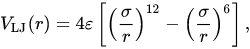

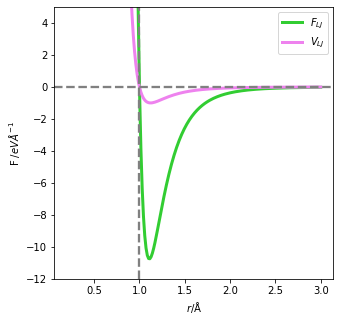

In [ ]:
#Last Update: Piyush 
#Lennard Jones Potential and Force 8 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0.2, 3, 200)
def lj_force(r, epsilon, sigma):
    return 48 * epsilon * np.power(sigma, 12) / np.power(r, 13) - 48 * epsilon * np.power(sigma, 6) / np.power(r, 7)
def lj_potential(r, epsilon, sigma):               
    epsilon = 1                                     # Energy minimum,well depth
    sigma = 1                                       # Distance to zero potential
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)   # Lennard-Jones potential
plt.figure(figsize=(5,5))
plt.plot(r, lj_force(r, 1, 1),color='limegreen',label=r'$F_{LJ}$',lw=3)
plt.plot(r, lj_potential(r,1,1),color='violet',label=r'$V_{LJ}$',lw=3)
plt.xlabel(r'$r$/Å',fontsize=10);plt.ylabel('F /$eVÅ^{-1}$',fontsize=10)
plt.ylim([-12,5])
plt.axhline(0, color='grey',linestyle='--',linewidth=2.3)
plt.axvline(1, color='grey',linestyle='--',linewidth=2.3)
plt.legend(loc='upper right')

image.png

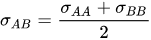

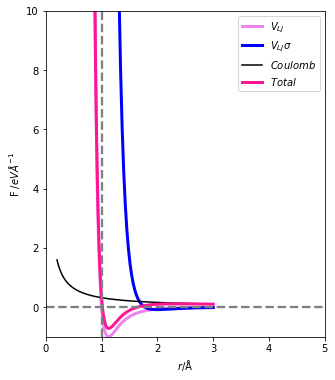

In [ ]:
#LJ Lorenz Berthelot combo
#Last modification :Aditya Piyush
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0.2, 3, 200)
def lj_potential_lor(r):  
    epsilon_AA=0.1521    #O-O
    epsilon_BB=0.046     #H-H   
    sigma_AA = 3.1507  #Oxygen Oxygen
    sigma_BB = 0.4     #H-H
    epsilon=(epsilon_AA*epsilon_BB)**0.5 
    sigma=(sigma_AA+sigma_BB)/2 
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6) 
def lj_potential(r, epsilon, sigma):               
    epsilon = 1                                     # Energy minimum,well depth
    sigma = 1                                       # Distance to zero potential
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)   # Lennard-Jones potential
plt.figure(figsize=(5,6))

def electrostatic(r,q1,q2):
  return (q1*q2)/(4*np.pi*1*r)
#plt.plot(r, lj_force(r, 1, 1),color='limegreen',label=r'$F_{LJ}$',lw=3)
plt.plot(r, lj_potential(r,1,1),color='violet',label=r'$V_{LJ}$',lw=3) 
#plt.figure(figsize=(5,5))
plt.plot(r, lj_potential_lor(r),color='blue',label=r'$V_{LJ} \sigma$',lw=3)
plt.plot(r,electrostatic(r,2,2),color='black',label=r'$Coulomb$')
plt.plot(r,electrostatic(r,2,2)+lj_potential(r,1,1),color='deeppink',lw=3,label=r'$Total$')
plt.xlabel(r'$r$/Å',fontsize=10);plt.ylabel('F /$eVÅ^{-1}$',fontsize=10)
plt.ylim([-1,10])
plt.xlim([0,5])
plt.axhline(0, color='grey',linestyle='--',linewidth=2.3)
plt.axvline(1, color='grey',linestyle='--',linewidth=2.3)
plt.legend(loc='upper right')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
    
    # Solve x" = f(x) using leapfrog integrator
    
    # For this demo, x'' + x = 0
    # Exact solution is x(t) = sin(t)
def f(x):
  return -x
    
k = 5               # number of periods
N = 16              # number of time steps per period
h = 2*np.pi/N       # step size
x = np.empty(k*N+1) # positions
v = np.empty(k*N+1) # velocities
    
# Initial conditions
x[0] = 0
v[0] = 1
anew = f(x[0])
    
# leapfrog method
for i in range(1, k*N+1):
  aold = anew
  x[i] = x[i-1] + v[i-1]*h + 0.5*aold*h**2
  anew = f(x[i])
  v[i] = v[i-1] + 0.5*(aold + anew)*h

Ryckart-Bellman Potential
$$ V_{rb}(\phi_{ijkl}) = \sum_{n=0}^5 C_n( \cos(\psi ))^n,$$

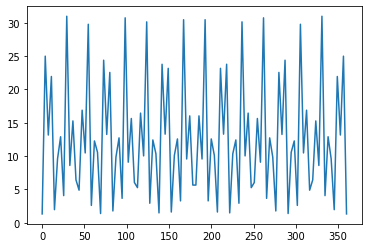

In [ ]:
#last update Piyush correction required
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,360,100)
C=[9.28,12.16,-13.12,-3.06,26.24,-31.5]
def RB(phi):
  x1=180-x
  return C[0]+C[1]*np.cos(x1)+C[2]*(np.cos(x1))**2+C[3]*(np.cos(x1))**3+C[4]*(np.cos(x1))**4
plt.plot(x,RB(x))


*Harmonic angle potential*
$$V_a({\theta_{ijk}}) = {\frac{1}{2}}k^{\theta}_{ijk}({\theta_{ijk}}-{\theta_{ijk}}^0)^2 $$

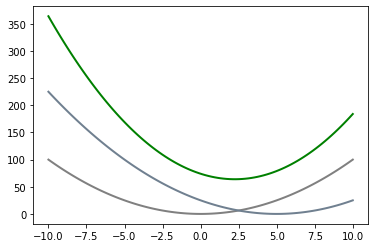

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-10,10,100)
y=x**2
y1=(x-5)**2
y2=(x+7**2)
plt.plot(x,y,color='grey',linewidth=2.0)
plt.plot(x,y1,color='slategray',linewidth=2.0)
plt.plot(x,y+y1+y2,color='green',linewidth=2.0)

**Force Fields**

*CHARMM*

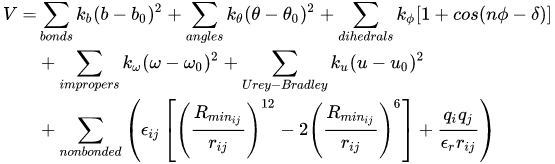

In [ ]:
#CHARMM Force Field

*OPLS*

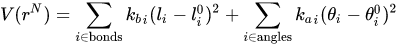

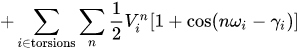

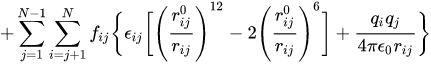

In [ ]:
#OPLS Force Field

**Geometry Optimization**

*Newton Raphson*

$$ x_{n+1} = x_{n} - \frac{f(x_{n})}{f^{\prime}(x_{n})} $$


root = 6.283185307179641


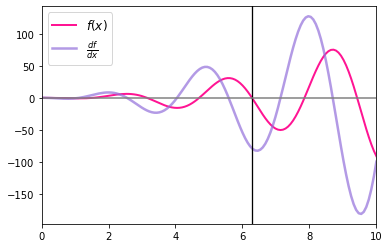

In [ ]:
#Last update:Piyush
import numpy as np 
import matplotlib.pyplot as plt
x=np.linspace(-5,10,200)
def f(x):     #function
  return -x**2*np.sin(2*x)
def f_prime(x):   #first derivative
  return -2*x*(np.sin(2*x)+x*np.cos(2*x))
def newtoroot(f, df, x0, tol):  #newton raphson method
    if abs(f(x0)) < tol:
        return x0
    else:
        return newtoroot(f, df, x0 - f(x0)/df(x0), tol)
        #broo nikal root nikaal
result = newtoroot(f,f_prime, 6.9, 1e-5)
print("root =", result)
plt.figure(figsize=(6,4))
plt.xlim([0,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.plot(x,f_prime(x),label=r'$\frac{df}{dx}$',linewidth=2.5,color='mediumpurple',alpha=0.7)
plt.axvline(x=result,color='black',linewidth=1.3)
plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

*BFGS Algorithm*

In [ ]:
#Last update:Piyush
from scipy.optimize import minimize
from numpy.random import rand
def f(x):
    return - 1.0 * np.exp(-x[0]**2 - x[1]**2)
    #return x[0]**2.0 + x[1]**2.0
    #return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2   #Himmelblau function 
r_min, r_max = -5.0, 5.0   #input range
#start = r_min + rand(2)*(r_max - r_min)     #random start point
start = [-2.0,-2.1]                          #manual start point
answer = minimize(f, start, method='L-BFGS-B')    #L-BFGS-B algorithm 
#answer = minimize(f, start, method='nelder-mead') #Nelder MEad algorithm 
minion = answer['x']  #minimum of function
calc = f(minion)      #value of function at minimum
print('x_min,y_min:',minion)
print('f(x_min,y_min)=',calc)

x_min,y_min: [-2.84967704e-06 -2.98898312e-06]
f(x_min,y_min)= -0.9999999999829453


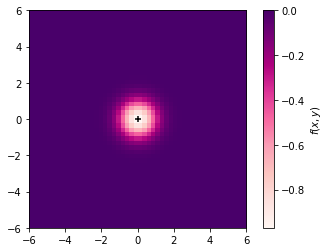

In [ ]:
def funcy(x):
    #return x[0]**2+x[1]**2
    return - 1.0 * np.exp(-x[0]**2 - x[1]**2)
    #return (x[0]**2+y-11)**2+(x[0]+x[1]**2-7)**2
x = np.linspace(-6,6) ;  y = np.linspace(-6, 6)
x1, y1 = np.meshgrid(x, y)    #grid ban gaya
plt.imshow(funcy([x1, y1]), extent=[-6, 6, -6, 6], origin="lower",cmap='RdPu')
plt.colorbar(label=r'$f(x,y)$')
plt.scatter(minion[0], minion[1],color='black',marker='+')  # ye raha minimum 

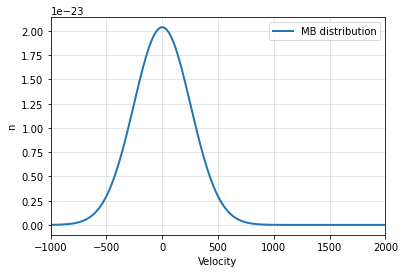

In [ ]:
#Last update:Piyush
#correction required CHECK UNITS!!! probably wrong
#Maxwell Boltzmann distribution
import numpy as np
import matplotlib.pyplot as plt
v= np.linspace(-1000,2000,200)  #list of values 
#Constants
h=6.626e-34 ;c=3.0e+8;k=1.38e-23;m=39.948*1.6e-27
def maxwell(T):
    a=(m/2*3.14*k*T)**(1/2)
    b=np.exp((-m*v*v)/(2*k*T))
    return a*b
plt.plot(v,maxwell(300),linewidth=2.0,label='MB distribution')
plt.xlim(-1000,2000)
plt.xlabel('Velocity')
plt.ylabel('n')
plt.legend(loc='upper right')
plt.grid(alpha=0.4)

Velocity Verlet Algorithm

$$ r_{i}(t+\Delta t)=r_{i}(t)+v_{i}(t)\Delta t + \frac{1}{2}a_{i} \Delta t^{2}$$ \
$$v_{i}(t+\Delta t)=v_{i}(t)+\frac{1}{2}[a_{i}(t)+a_{i}(t+\Delta t)]\Delta t $$

In [ ]:
#Velocity Verlet Algorithm
def new_pos(x, v, a, dt):
    return x + v * dt + 0.5 * a * dt * dt
def new_velo(v, a, a1, dt):
    return v + 0.5 * (a + a1) * dt

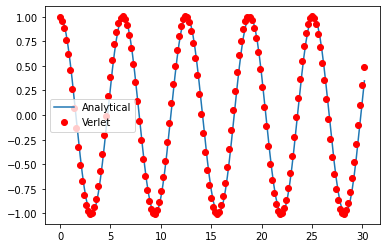

In [ ]:
# THE VERLET ALGORITHM(Aditya)
from numpy import *
import matplotlib.pyplot as plt
k = 1 # the spring constant
m = 1 # mass
dt = 0.2 # time step
tm = 30 # simulation time
# INITIAL CONDITIONS
x = [1] # initial position
v = [0] # initial velocity
t = [0] # initial time
# The Verlet Algorithm
# first we use The Euler-Cromer method to start the algorithm since Verlet is an explicit method
# and it depends on the previous value to generate the next value.
i = 0
while t[-1] <= tm:
    a = -(k/m)*x[i]
    if i == 0:
        # Euler-Cromer Method
        v_next = v[i] + a * dt
        x_next = x[i] + v_next * dt
    else:
        x_next = 2 * x[i] - x[i-1] + a * dt**2
    x.append(x_next)
    t.append(t[i] + dt)
    i = i + 1
omega = (k/m)**0.5   # ANALYTICAL SOLUTION
xan = x[0] * cos(omega * array(t))
plt.plot(t, xan, label = 'Analytical')
plt.plot(t,x,'ro',label = 'Verlet') # ro means red circles 
plt.legend(loc="best")
plt.show()

Text(0, 0.5, '$Error$')

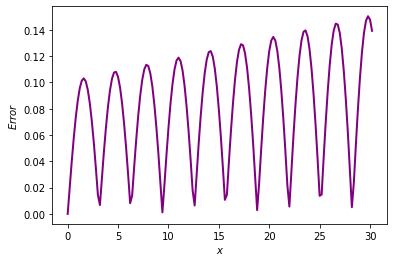

In [ ]:
#Error calculator Last update:Piyush
import numpy as np
#plt.plot(t, xan,color='orchid',linewidth=2.0,label ='Analytical')
plt.plot(t,np.abs(x-xan),color='purple',linewidth=2.0,label = 'Verlet') 
plt.xlabel(r'$x$')
plt.ylabel(r'$Error$')

Euler-Cromer Method


```
#Last update by Piyush
clc;clear;
length= 1;       %pendulum length                              
g=9.8;           %surface acceleration                           
n = 250;               
dt = 0.04;   
%q=0.5                   
omega = zeros(n,1); 
theta = zeros(n,1);  
time = zeros(n,1);    
theta(1)=0.2; 
for step = 1:n-1 % loop over timesteps              
%omega(step+1) = omega(step) - (g/length)*theta(step)*dt;  %Euler
omega(step+1) = omega(step) - (g/length)*theta(step)*dt-q*omega(step)*dt; %Damped
theta(step+1) = theta(step)+omega(step+1)*dt                              %Euler Cromer
time(step+1) = time(step) + dt;        
end  
plot(time,theta,'r' ); 
xlabel('time (seconds) '); 
ylabel('theta (radians)');   

```



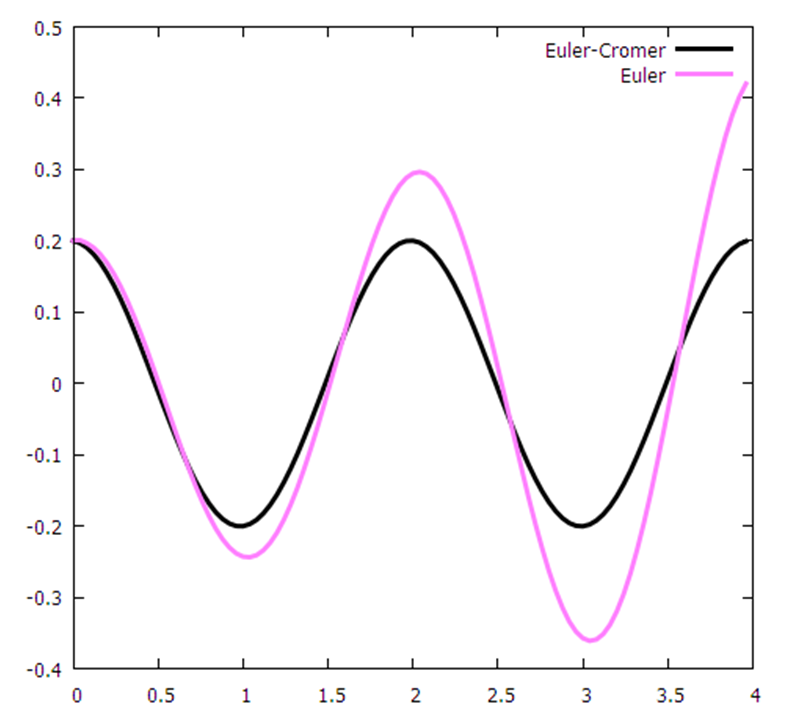

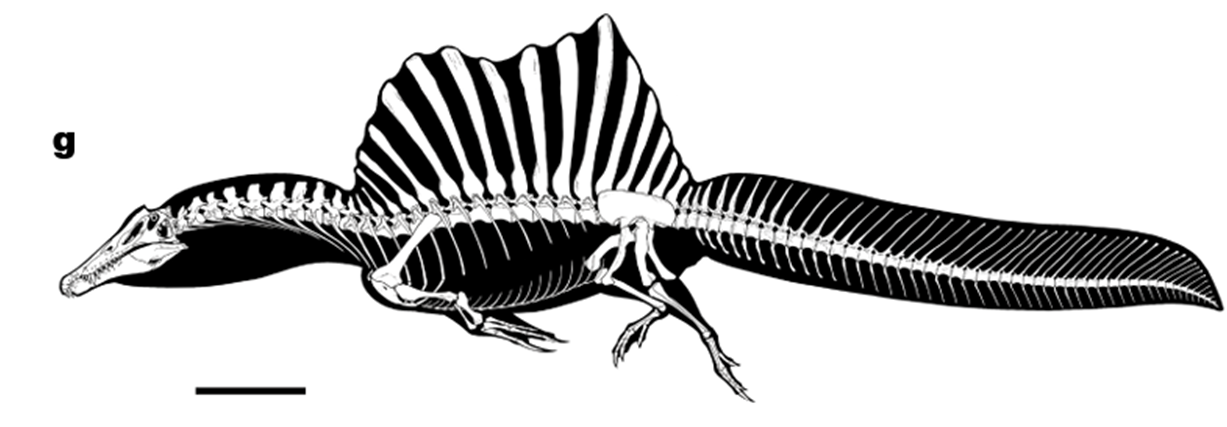

**Tutorials**

# **Computational Methods**

*Taylor Series*

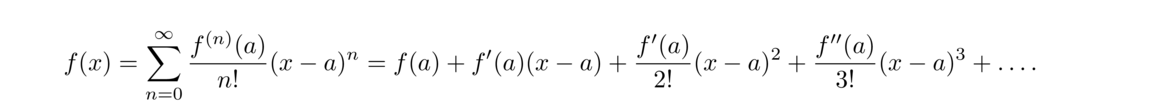

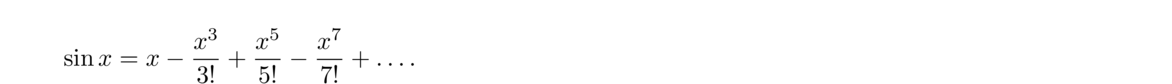

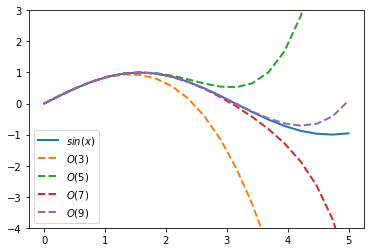

In [ ]:
#Last update:Piyush
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,5,20)
plt.ylim(-4, 3)
y1 = x  - x**3/6 
y2 = y1 + x**5/120
y3 = y2 - x**7/5040
y4 = y3 + x**9/362880
plt.plot(x, np.sin(x),'-',linewidth=2.0,label=r'$sin(x)$')
plt.plot(x,y1,'--',linewidth=2.0,label=r'$O(3)$')
plt.plot(x,y2, '--',linewidth=2.0,label=r'$O(5)$')
plt.plot(x,y3, '--',linewidth=2.0,label=r'$O(7)$')
plt.plot(x,y4, '--',linewidth=2.0,label=r'$O(9)$')
plt.legend(loc='lower left')

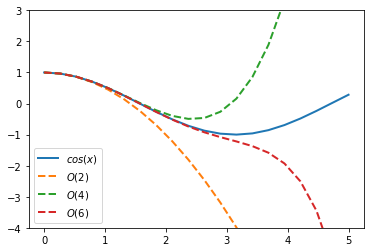

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x= np.linspace(0,5,20)
plt.ylim(-4,3)
y1=1-(x**2)/2
y2=y1+(x**4)/24
y3=y2-(x**6)/720
plt.plot(x,np.cos(x),'-',linewidth=2.0, label=r'$cos(x)$')
plt.plot(x,y1,'--',linewidth=2.0,label=r'$O(2)$')
plt.plot(x,y2, '--',linewidth=2.0,label=r'$O(4)$')
plt.plot(x,y3, '--',linewidth=2.0,label=r'$O(6)$')
plt.legend(loc='lower left')

*ODE Solvers*

$$y(x+h)=y(x)+hy'(x)$$ \
**Explicit Euler**\
$$y_{n+1}=y_{n}+hf'(x_n,y_n)$$ \
**Implicit Euler**
$$y_{n+1}=y_{n}+hf'(x_{n+1},y_{n+1})$$


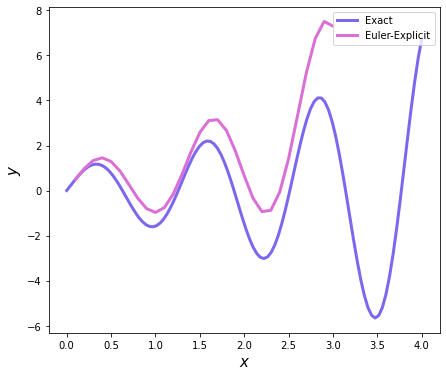

In [ ]:
#Last update:Piyush   8 Aug 2022
#required: try making a code that automatically determines the 
#derivative instead of relying on the user input
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,4,100)             
def euler_explicit(f_prime, y_0, a, b, h):#defining the euler method 
    N=int((b-a)/h)        #Number of steps
    x = a ; y = y_0       #Initial Values to the equation y(0) and x(0)
    x_out,y_out =[],[]
    for i in range(N):
        y = y + h*f_prime(x, y)  #y_n+1 = y_n + h * f
        x = x + h
        x_out.append(x)   
        y_out.append(y)
    return x_out, y_out
def solution(x):
  return np.exp(x/2)*np.sin(5*x)
def f_prime(x, y):
  return -0.5*np.exp(x/2)*np.sin(5*x)+5*np.exp(x/2)*np.cos(5*x)+y
   #return y*np.exp(y)+np.exp(y)
x_euler, y_euler = euler_explicit(f_prime, 0, 0, 3, 0.1)  #call the function and store the values in x and y
#plt.xlim([0,2])#plt.ylim([0.7,1.1])
plt.figure(figsize=(7,6))
plt.plot(x,solution(x),linewidth=3.0,color='mediumslateblue',label='Exact')
plt.plot(x_euler,y_euler,linewidth=3.0,color='orchid',label='Euler-Explicit')
plt.xlabel(r'$x$',fontsize=15);plt.ylabel(r'$y$',fontsize=15)
plt.legend(loc='upper right')

In [ ]:
#code required Error calculator between analytical and numerical for any range[a,b] be

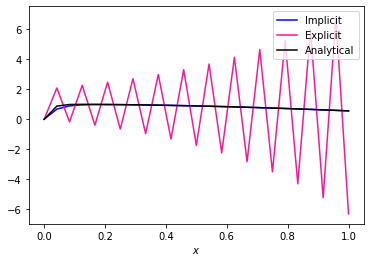

In [ ]:
#Euler Explicit and Euler Implicit
#Last update Piyush
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 25)   #gridpoints
def euler_explicit(x):
        y = np.zeros_like(x)  #empty array
        h = x[1] - x[0]   #step size
        for i in range(1, len(x)):
            y[i] = y[i-1] -50*h*(y[i-1] - np.cos(x[i]))
        return y
def euler_implicit(x):
        y = np.zeros_like(x)  #empty array
        h = x[1] - x[0]    #step size
        for i in range(1, len(x)):
            y[i] = (y[i-1] + 50*h*np.cos(x[i])) / (50*h + 1)
        return y
def solution(x):
        return (50/2501)*(np.sin(x) + 50*np.cos(x)) - (2500/2501)*np.exp(-50*x)
plt.plot(x,euler_implicit(x),color='blue',label='Implicit')
plt.plot(x,euler_explicit(x),color='deeppink',label='Explicit')
plt.plot(x,solution(x),color='black',label='Analytical')
plt.xlabel(r'$x$')
plt.legend(loc='upper right')

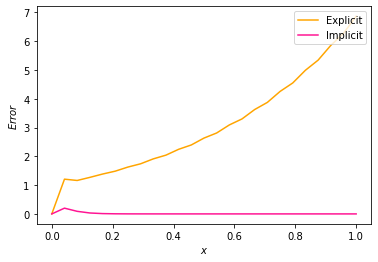

In [ ]:
#Error calculator
#Last update Piyush 17 Aug 2022
plt.plot(x,np.abs(solution(x)-euler_explicit(x)),color='orange',label='Explicit')
plt.plot(x,np.abs(solution(x)-euler_implicit(x)),color='deeppink',label='Implicit')
plt.xlabel(r'$x$')
plt.ylabel(r'$Error$')
plt.legend(loc='upper right')

***RK-4 method***

Solving the beast:
$$\frac{dy}{dx}=-50(y-cos(x)) $$

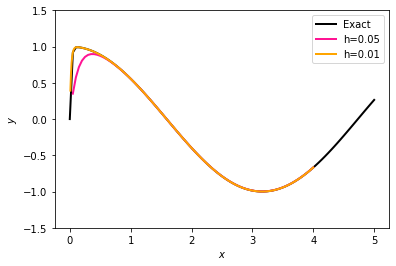

In [ ]:
#Last Update:Piyush 
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 100)
def RK4(f_prime, y_0, a, b, h):
    N=int((b-a)/h)  #Number of steps
    x = a ; y = y_0
    x_out,y_out =[],[]
    for i in range(N):
        k1 = h*f_prime(x,y)
        k2 = h*f_prime(x+0.5*h,y+0.5*k1)
        k3 = h*f_prime(x+0.5*h,y+0.5*k2)
        k4 = h*f_prime(x+h,y+k3)

        y = y+ (1/6)*(k1+2*k2+2*k3+k4)   #RK-4 
        x = x + h
        #print(x,y)
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out
def f_prime(x, y):  #Differential equation
  return 50*(np.cos(x)-y)
def solution(x):    #Analytical solution
  return (50/2501)*(np.sin(x)+50*np.cos(x)-50*np.exp(-50*x))  #y(0)=0
x_RK, y_RK = RK4(f_prime, 0, 0, 4, 0.05)
x_RK1, y_RK1 = RK4(f_prime, 0, 0, 4, 0.01)

plt.xlabel(r'$x$');plt.ylabel(r'$y$')
plt.ylim([-1.5,1.5])
plt.plot(x,solution(x),color='black',linewidth=2.0,label='Exact')
plt.plot(x_RK,y_RK,color='deeppink',linewidth=2.0,label='h=0.05')
plt.plot(x_RK1,y_RK1,color='orange',linewidth=2.0,label='h=0.01')
plt.legend(loc='upper right')

In [ ]:
#Runge-Kutta Fourth Order: Fortran
#Last Update: Nirmalya

program rk
implicit none
real::a,b,h,y,k1,k2,k3,k4,k,f,x,x1,y1 
integer::n,i           
print*, 'Input Values'
read*, a,b
print*,'stepsize: '
read*,h
print*,'input value of x at which y is required'
read*, x
x1=a
y1=b
print*,x1,y1
n = (abs(x-a))/h
print*, n
do i =1,n
k1=h*f(x1,y1)
k2 =h*f((x1+(h/2)),(y1+(k1/2)))
k3 =h*f((x1+(h/2)),(y1+(k2/2)))
k4=h*f((x1+h),(y1+k3))
k=(1/6.)*(k1+(2*k2)+(2*k3)+k4)
x1=x1+h
y1=y1+k
print*,(x1+h),y1

end do

end program

real function f(x,y)
implicit none
real::x,y
f = y**2+x**2
return
end function
!aami kichu jaani na aami kichu maani na 
!Amio kichu jani na , Amio kichu mani na 
!Jante chai o na, mante chai o na



In [ ]:
!Consider an ordinary differential equation dy/dx = (x-y)/2, y(0) = 1. Find y(1.05) using the fourth order Runge-Kutta method.
!y(1) = 1.2 means that x0 =0 and the corresponding y0 is 1, and the valu eof x fo rwhich we want to solve our ODE is 1.05
!We will use this in our code.
!Using step-size h = 0.05

program Runge_kutta_4
implicit none

real, external ::f !RK is the main RK,and f is the dydx function
real :: x0, y0,x,y,h, k1, k2, k3, k4
integer :: n,i
print*,"***************Solution of ODE using Runge Kutta Fourth Order***************"
print*, "Enter x0: "
read*, x0
print*, "Enter y0: "
read*,y0
print*, "Enter the value of x at which you want to solve the differential equation: "
read*,x
print*,"Enter the step size h "
read*,h

n = (x -x0)/h ! Counting the no. of Iterations using the step size h
y = y0

do i=1,n
   k1 = h *f(x0,y)
   k2 = h *f(x0 + (0.5*h), y +(0.5*k1))
   k3 = h *f(x0 + (0.5*h), y +(0.5*k2))
   k4 = h *f(x0 +h, y + k3)
   !Updaet the next valu eof y
   y = y + (1./6.)*(k1 + (2*k2) + (2*k3) + k4)
   !Updadte the next value of x
   x0 = x0 + h
end do 

print*,"The Solution of the ODE with RK4 is: ", y

end program

real function f(a,b)
implicit none
real:: a,b
f = (a - b)/2 
end function


In [ ]:
***************Solution of ODE using Runge Kutta Fourth Order***************
 Enter x0: 
0
 Enter y0: 
1
 Enter the value of x at which you want to solve the differential equation: 
2
 Enter the step size h 
0.05
 The Solution of the ODE with RK4 is:    1.10363829    


***Predictor-Corrector Methods***

https://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node6.html \
https://math.gsu.edu/xye/course/na_handout/slides/ivp_handout.pdf

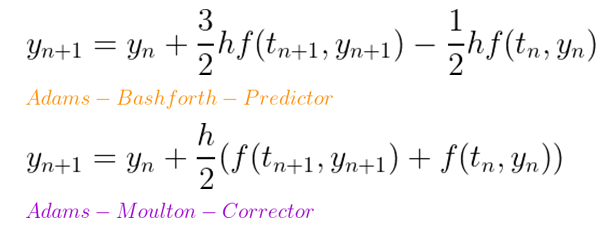

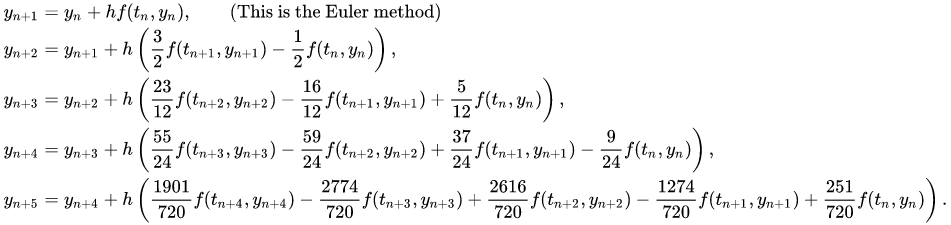

FORTRAN code:



```FORTRAN
program Predictor
IMPLICIT NONE
REAL::a,b,h,y_0,f_prime
INTEGER::N,i
real, allocatable :: x(:), y(:)
a=0
b=4
h=0.1
y_0=0
N=INT((b-a)/h) !Number of steps
allocate(x(N),y(N))
x(1) = a 
y(1) = y_0
x(2) = a+h       !Adam Bashforth 2 Step Method
y(2) = y_0+h*f_prime(x(1),y(1))
do i=2,N
    y(i+1) = y(i) + (h/2)*(3*f_prime(x(i),y(i))-f_prime(x(i-1),y(i-1)))
    x(i+1) = x(i) + h
    y(i+1) = y(i) + (h/2)*(f_prime(x(i+1),y(i+1))+f_prime(x(i),y(i)))

end do
do i = 1,N
    write(*,*) x(i),y(i)
    x(i)=x(i)+h
  end do
end program Predictor

REAL function f_prime(x1,y1)
REAL::x1,y1
  f_prime=-0.5*EXP(x1/2)*SIN(5*x1)+5*EXP(x1/2)*COS(5*x1)+y1
return
end function
```

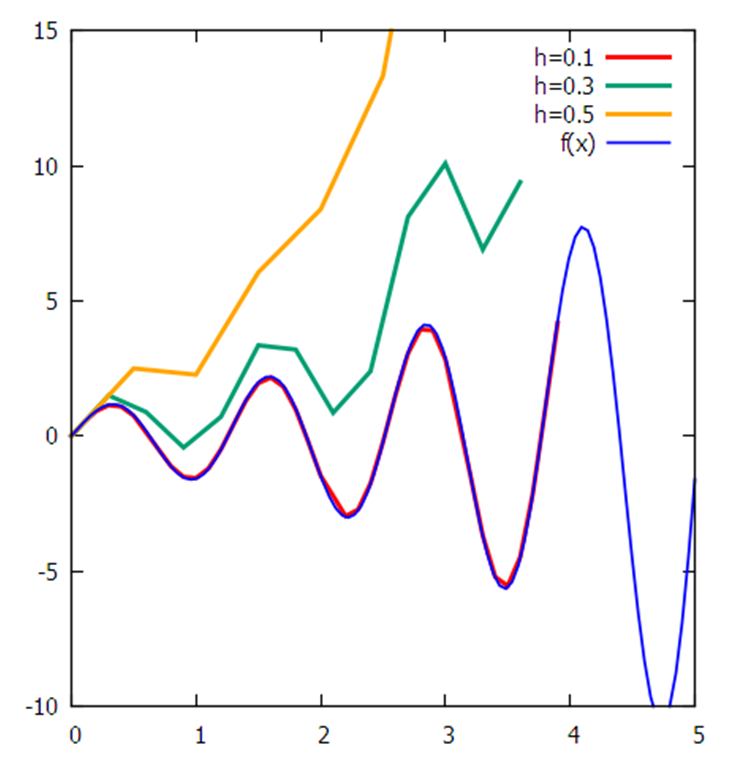

**Root Finding**

*Bisection Method:FORTRAN*

```
!Last update : Aditya
program bisection_2
implicit none
real,parameter :: tol = 0.000001
real :: a,b,c,f
print *, "Enter a and b simultaneously between which the roots are to be found"
10 read *, a,b
11 if (f(a) * f(b) .lt. 0) then
      c = (a+b)/2
   else 
      print*, "Try with other values of a and b"
      goto 10
   end if
if (f(a) * f(c) .lt. 0) then
   b = c
else 
   a = c
end if
if (abs(b-a) .gt. tol) then
   goto 11
end if
print*, "The root is c =", c
end program


real function f(x)
implicit none 
real :: x 
f = x**3 - 3*x + 1
end function

```





**Output of the above bisection code:**
```
Enter a and b simultaneously between which the roots are to be found
1
3
 The root is c =   1.53208828    

```



***FALSE POSITION METHOD: FORTRAN CODE***



```
#Last update: Aditya
program false_position
implicit none
real, parameter :: tol = 1e-8
real :: a,b,f,c
10 print*,"Enter lower limit:"
read*, a
print*,"Enter upper limit:"
read*, b
11 if(f(a) * f(b) .lt. 0) then
      c = (a*f(b) - b*f(a))/(f(b)-f(a))
   else
      print*, "Try with other values of a and b"
      goto 10
   end if
if (f(a) * f(c) .lt. 0) then
   b = c
else
   a = c
end if
if( abs(f(c)) .lt. tol) then
   print*, "The root is c =", c
else
   goto 11
end if 
end program false_position

real function f(x)
implicit none 
real :: x 
f = x**2 - 3*x + 1
end function

```




**Output of the above false position code:**
```
Enter lower limit:
-1
 Enter upper limit:
5
 Try with other values of a and b
 Enter lower limit:
0
 Enter upper limit:
1
 The root is c =  0.381965995    

```



In [ ]:
#False position Method:
#Last Update:Aditya

def f(x):
  return x**2 - 3*x +1

a = float(input('Enter lower limit: '))
b = float(input('Enter upper limit: '))
tol = 0.000000000001
cond = True
s = 1
while (cond):
  if ((f(a)*f(b)) < 0):
    c = ((a*f(b)) - (b*f(a)))/(f(b)-f(a))
    if ((f(a)*f(c))<0):
      b = c
    else:
      a = c
  else:
    print("Try MF")
  s = s+1 
  cond = abs(f(c))>tol
print(c)

Enter lower limit: 0
Enter upper limit: 1
0.38196601125035184

*Bisection Method:Python*

**Multiple root finder**

In [ ]:
#15 Sep 2022
#Last update DJ and Piyush
import numpy as np
import matplotlib.pyplot as plt
import random
a = []
b = []
gap = 1
x=np.linspace(-5,10,200)
def f(x):     #function
  return x**3-3*x+1
for i in range(5):
  c=random.randrange(-5, 5)
  a.append(c)
  b.append(c+gap)
  #print(np.sign(f(a[i])))
print("a:",a)
print("b:",b)


a: [0, -4, 3, -5, -2]
b: [1, -3, 4, -4, -1]


In [ ]:
#Last update :Piyush 
#please run this code cell until it shows no error 
corn=[]
for i in range(len(a)):
  if (np.sign(f(a[i])) * np.sign(f(b[i]))) > 0 :
     corn.append(i)   
for i in range(len(corn)):
  a.pop(corn[i])
  b.pop(corn[i])
print("a:",a)
print("b:",b)

a: [0, -2]
b: [1, -1]


root = 0.34729766845703125
root = -1.879384994506836


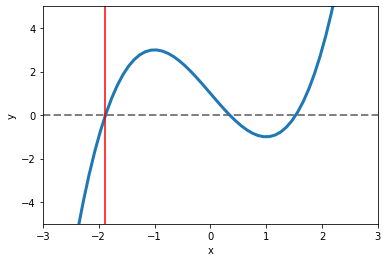

In [ ]:
#Last update:Piyush
import numpy as np
import matplotlib.pyplot as plt
def bisectionhaitaakat(f, a, b, sehlo): 
    if (np.sign(f(a)))*(np.sign(f(b))) > 0:
          print("can't do it") 
    mid = (a + b)/2 #midpoint #sehlo is tolerance  
    if np.abs(f(mid)) < sehlo:     #jab tak root mil jaye
        return mid   #root mil gaya that's it
    elif np.sign(f(a)) == np.sign(f(mid)):
        return bisectionhaitaakat(f, mid, b,sehlo)
    elif np.sign(f(b)) == np.sign(f(mid)):
        return bisectionhaitaakat(f, a, mid,sehlo)
        
x=np.linspace(-5,5,100)
def f(x):
   return x**3-3*x+1            #yeh raha function
plt.xlabel('x');plt.ylabel('y')
plt.xlim([-3,3.0]);plt.ylim([-5,5])
plt.axhline(0, color='grey',linestyle='--',linewidth=2)

for i in range(len(a)):
  root= bisectionhaitaakat(f,a[i],b[i], 1e-5)   #function call kiya
  print("root =", root)
  #print("f(root) =", f(root)) #ideally f(root) has to be zero
plt.plot(x,f(x),'-',linewidth=3.0)
plt.axvline(root,color='red',linewidth=1.5)

In [ ]:
#Bisection method using array of random no.s
#Last update: Aditya 
import numpy as np
import random
#random.seed(5)
x=[];y=[]
for i in range(10):
    x.append(random.randint(-10,10))
    y.append(random.randint(-10,10))
def f(x):
    return x**3 -3*x+1
tol = 1e-08
print(x)
print(y)
for a in range(len(x)):
    for b in range(len(y)):
        if(f(x[a]) * f(y[b]) < 0):
            c= (x[a] + y[b])/2
            if(f(x[a]) * f(c) < 0):
                y[b] = c
            else:
                x[a] = c
            if(f(c) < tol or f(c) == 0):
                print("Root is", c)
            else:
                continue
        else:
            continue

[-3, -3, -7, -2, -8, 9, -1, 10, 10, -4]
[7, -9, -10, -4, 2, 8, 1, 0, 3, 2]
Root is -2.25
Root is -3.75
Root is -2.75
Root is -2.125
Root is -4.625
Root is -3.25
Root is -2.5
Root is -2.125
Root is -1.96875
Root is -1.921875
Root is -5.0
Root is -2.0
Root is 0.5
Root is -5.0
Root is -3.0
Root is -2.625
Root is -2.25
Root is -2.0
Root is -1.90625
Root is -1.890625


**Vanilla Bisection**

1.5
1.75
1.625
1.5625
1.53125
1.546875
1.5390625
1.53515625
1.533203125
1.5322265625
1.53173828125
1.531982421875
1.5321044921875
1.53204345703125
1.532073974609375
root = 1.5320892333984375
f(root) = 1.4031847079820636e-06


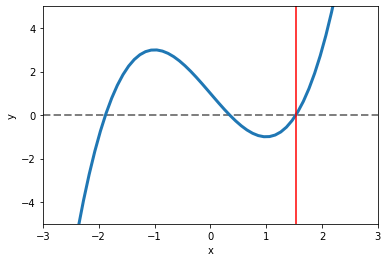

In [ ]:
#Last update:Piyush
import numpy as np
import matplotlib.pyplot as plt

def bisectionhaitaakat(f, a, b, sehlo): 
    if (np.sign(f(a)))*(np.sign(f(b))) > 0:
          print("can't do it") 
    mid = (a + b)/2 #midpoint #sehlo is tolerance  
    if np.abs(f(mid)) < sehlo:     #jab tak root mil jaye
        return mid   #root mil gaya that's it
    elif np.sign(f(a)) == np.sign(f(mid)):
        print(mid)
        return bisectionhaitaakat(f, mid, b,sehlo)
    elif np.sign(f(b)) == np.sign(f(mid)):
        print(mid)
        return bisectionhaitaakat(f, a, mid,sehlo)
        
x=np.linspace(-5,5,100)
def f(x):
   return x**3-3*x+1            #yeh raha function
plt.xlabel('x');plt.ylabel('y')
plt.xlim([-3,3.0]);plt.ylim([-5,5])
plt.axhline(0, color='grey',linestyle='--',linewidth=2)

root= bisectionhaitaakat(f,1,2, 1e-5)   #function call kiya
print("root =", root)
print("f(root) =", f(root)) #ideally f(root) has to be zero
plt.plot(x,f(x),'-',linewidth=3.0)
plt.axvline(root,color='red',linewidth=1.5)

In [ ]:
#Last update Ananya
import numpy as np
def f(x):
  return (x**4-x**3-5)
gap = 2
a = np.arange(-100,100,2)
b = a + gap
#print(a)
#print(b)
fil = []
for i in range(len(a)):
  if f(a[i]) * f(b[i]) > 0:
    fil.append(i)
#print(fil)
a = np.delete(a,fil)
b = np.delete(b,fil)
print("a=", a)
print("b=", b)

a= [-2  0]
b= [0 2]


**Newton Raphson**

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)} $$

1.2
1.8606060606060604
1.6088541478282465
1.5379627005114658
1.5321277008797534
root = 1.5320888879510492


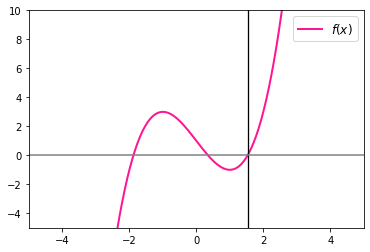

In [ ]:
#Last update:Piyush
import numpy as np 
import matplotlib.pyplot as plt

x=np.linspace(-5,10,200)

def f(x):     #function
  return x**3-3*x+1

def f_prime(x):   #first derivative
  return 3*x**2-3
  
def newtoroot(f, df, x0, tol):  #newton raphson method
    if abs(f(x0)) < tol:
        return x0
    else:
        print(x0)
        return newtoroot(f, df, x0 - f(x0)/df(x0), tol)

result = newtoroot(f,f_prime, 1.2, 1e-5) #broo nikal root nikaal
print("root =", result)


plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.axvline(x=result,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

**Newton Raphson multiple root finder**

[-3, -2, 4, 3, 3, 3]
root = -1.8793852418279906
root = -1.879385244836671
root = 1.5320897486564136
root = 1.5320888862613389
root = 1.5320888862613389
root = 1.5320888862613389


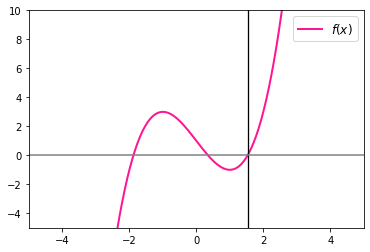

In [ ]:
#Last update:Piyush
import numpy as np 
import matplotlib.pyplot as plt
import random

x=np.linspace(-5,10,200)
def f(x):     #function
  return x**3-3*x+1
def f_prime(x):   #first derivative
  return 3*x**2-3

def newtoroot(f, df, x0, tol):  #newton raphson method
    if abs(f(x0)) < tol:
        return x0
    else:
        #print(x0)
        return newtoroot(f, df, x0 - f(x0)/df(x0), tol)
start = []
num   = 10
N     = 5
for i in range(num):
  c=random.randrange(-N, N)
  if(f_prime(c)>0):
    start.append(c)
print(start)

result=[]
for i in range(len(start)):
  result = newtoroot(f,f_prime,start[i], 1e-5) #broo nikal root nikaal
  print("root =", result)
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.axvline(x=result,color='black',linewidth=1.3);
plt.axhline(y=0,color='grey')
plt.legend(fontsize='12')

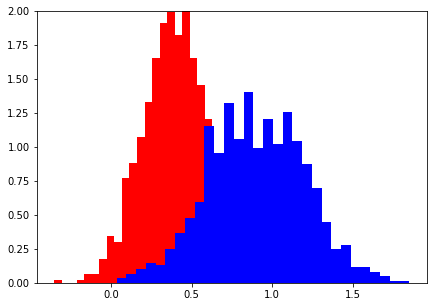

In [ ]:
res =np.random.randn(1000)*0.2+0.4
res1 =np.random.randn(1000)*0.3+0.9
plt.figure(figsize=(7,5))
plt.ylim([0,2])
plt.hist(res,histtype='stepfilled',bins=30,color='red',density=True)
plt.hist(res1,histtype='stepfilled',bins=30,color='blue',density=True)
plt.show()

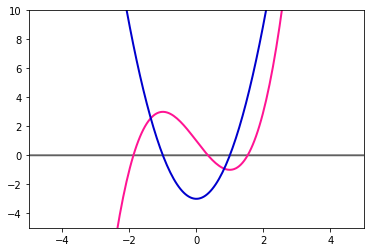

In [ ]:
#Last update:Piyush
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-5,5,200)
def f(x):     #function
  return x**3-3*x+1
def f_prime(x):   #first derivative
  return 3*x**2-3
plt.figure(figsize=(6,4));plt.xlim([-5,5]);plt.ylim([-5,10])
plt.axhline(y=0,color='black',linewidth=1.3);plt.axhline(y=0,color='grey')
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.plot(x,f_prime(x),label=r'$f(x)$',linewidth=2.0,color='mediumblue')



```
# program newtonraphson

implicit none

integer::i,n

real::x,f,g,e

 e= 1.0e-06

print*,'initial approx'

10 read*, x

n=10

do i=1,n

f = (x**3)-3*x + 1

g = 3*(x**2)- 3

x = x- (f/g)

end do

print*,'root is',x
end program
```





```
program newtonraphson
implicit none
integer::i,n
real::f,g,e
real::x
open (1, file='nr12.txt', action ='read')
 e=1.0e-10
read(1,*) x

do while (abs(f) < e)
n=10

 do  i=1,n
   
   f = (x**3)-3*x + 1
   g = 3*(x**2)- 3
   x = x- (f/g)
   end do

end do
print*,'Root is',x

close(1)
end program
```



**Fixed Point Iteration**

$$f(x)=x^3+2x^2+x-1 =0 $$
$$\phi(x)=x=\frac{1}{x^2+2x+1} $$
$$\phi(x)=x=(-2x^2-x+1)^{\frac{1}{3}}$$



(-3.0, 4.0)

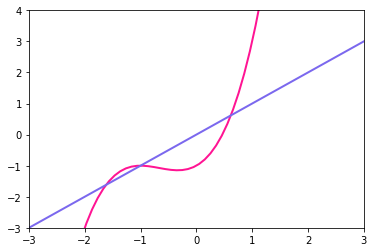

In [ ]:
#LAst update Piyush
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,100)
def f(x):
  return x**3+2*x**2+x-1
plt.plot(x,f(x),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.plot(x,x,linewidth=2.0,color='mediumslateblue')
plt.xlim([-3,3.0]);plt.ylim([-3,4])

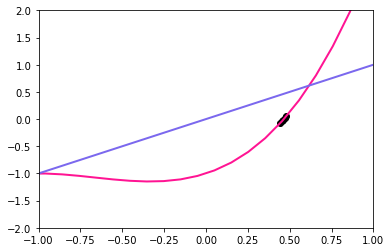

In [ ]:
#Last update Piyush
x = 0.5; N=5
root,func=[],[]
for i in range(N):
    x = 1/(x**2+2*x+1)
    f = x**3+2*x**2+x-1
    root.append(x)
    func.append(f)

x1=np.linspace(-5,5,100)
def f(x):
  return x**3+2*x**2+x-1
plt.xlim([-1,1]);plt.ylim([-2,2])
plt.plot(x1,f(x1),label=r'$f(x)$',linewidth=2.0,color='deeppink')
plt.plot(x1,x1,linewidth=2.0,color='mediumslateblue')
plt.scatter(root,func,color='black')

**Secant Method**

**Numerical Integration**

*Trapezoid Rule*

$$\int_a^b f(x) dx \approx \frac{h}{2} \left(f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n)\right)
 $$

Trapezoidal = 0.3023703703703704


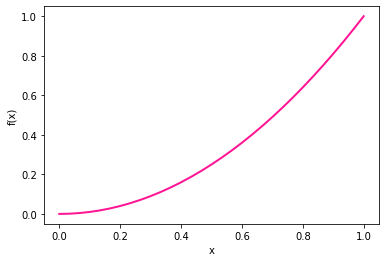

In [ ]:
#Last Update Piyush 17 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
a = 0 ; b =1
n = 31 ;h = (b-a)/(n-1)
x = np.linspace(a, b, n)
#f = np.sin(x)  #function define karo bhai log
f = x**2
I_trap = (h/2)*(f[0]+2*sum(f[1:n-2:1])+f[n-1])
plt.plot(x,x**2,color='deeppink',linewidth=2.0,label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
print('Trapezoidal =',I_trap)

In [ ]:
#Last Update Piyush
//Trapezoidal Method 
#include<iostream>
#include<cmath>
using namespace std;
double f(double x)        //write the function whose definite integral is to be calcuated here
{
    double a=1/(1+x*x);
    return a;
}
int main()
{
    int n,i;        //n is for subintervals and i is for loop
    double a,b,h,sum=0,integral;    
    cout<<"Enter the limits of integration,\nInitial limit,a=";    //get the limits of integration
    cin>>a;
    cout<<"Final limit, b=";
    cin>>b;
    cout<<"Enter the no. of subintervals, n=";//get the no. of subintervals
    cin>>n;    
    double x[n+1],y[n+1];    
    h=(b-a)/n;                //get the width of the subintervals
    for (i=0;i<=n;i++)            
    {                    //loop to evaluate x0,...xn and y0,...yn
        x[i]=a+i*h;            //and store them in arrays
        y[i]=f(x[i]);
    }
    for (i=1;i<n;i++)            //loop to evaluate h*(y1+...+yn-1)
    {
        sum=sum+h*y[i];
    }
    integral=h/2.0*(y[0]+y[n])+sum;        //h/2*[y0+yn+2(y1+y2+y3+...yn-1)]
    cout<<"The definite integral  is "<<integral<<endl;
    return 0;



```
#last update by Nirmalya
program trapezoidal
implicit none
real:: a,b,h,s,ans,f
integer::n,i
read*, a,b,n

h = (b-a)/n
s = 0.5*(f(a)+f(b))

do i = 1,(n-1)
s = s+f(a+i*h)
end do

ans = s*h
print*, 'Result is ',ans
end program trapezoidal

real function f(x)
implicit none
real::x
f = 1/x
end function f
```



In [ ]:
!fortran code for trapezoid rule
! last update::arpita

program trapezoid
implicit none
real::a,b,h,int_sum,func,integral
integer::i,n
a=0
b=1
n=6
h=(b-a)/n
int_sum=0
do i=1,n-1
int_sum=int_sum+func(a+i*h)
end do
integral=h*(func(a)+2*int_sum+func(b))/2
write(*,*)integral
end program trapezoid

real function func(x)
implicit none
real::x
func=1/(1+exp(x**2))
end function func

*Simpson's Rule*

$$\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right].$$


 #not working
program simpson

implicit none

real:: a,b,integ,f,k

integer:: i,n,h

read(*,*) n

real,allocatable:: x(:)

allocate(x(n))

a = 0

b = 10

h = int((b-a)/n)

integ = f(a) + f(b)

do i =2,n-1

k = a + i*h

if i mod 2 == 0

integ = integ + (2*f(k))

else

integ = integ + (4*f(k))

end if

i = i+1

end do

integ = integ*(h/3)

write(*,*) integ

end program simpson

real function f(x1)

real:: x1

f = 1/x1

return

end function f

In [ ]:
#Last update Piyush 22 Dec 2022
PROGRAM numtrapz
IMPLICIT NONE 
real,allocatable :: x(:),y(:)
integer          :: N,i,num
real             :: sumtrap
!counter gin bhai
N = 0
OPEN (1, file ='data.txt')
DO
    READ (1,*, END=10)
    N = N + 1
END DO
10 CLOSE (1)
!print*,N   
allocate (x(N),y(N))  !allocate the arrays from the text file
!Reading the coefficients from the file
open (unit = 1, file ='data.txt', status ='old')

DO i = 1,N 
     read (1,*) x(i),y(i)
END DO
close (1)
DO i = 1,N
    write(*,*) x(i),y(i)
END DO

sumtrap =0
DO i=2,N
   sumtrap = sumtrap+ 0.5*(y(i-1)+y(i))*(x(i)-x(i-1))
END DO
WRITE(*,*)sumtrap
END PROGRAM numtrapz

In [ ]:
!fortran code for simpson 1/3 rule
!last update::arpita(special credits:piyush)

program simpson
implicit none
real::a,b,h,sum_odd,sum_even,func,integral
integer::i,n
a=0
b=1
n=8
h=(b-a)/n
sum_odd=0
sum_even=0
do i=2,n-2,2
    sum_even=sum_even+func(a+i*h)
end do
do i=1,n-1,2
    sum_odd=sum_odd+func(a+i*h)
end do
integral=(h/3)*(func(a)+4*sum_odd+2*sum_even+func(b))
write(*,*)integral    
end program simpson


real function func(x)
implicit none
real::x
func=x**3
end function func

*Gauss Quadrature*

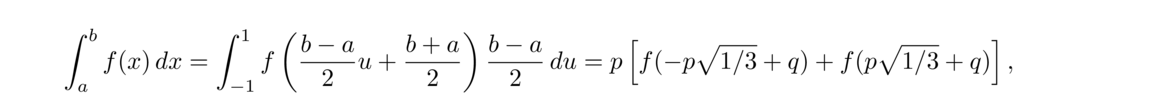

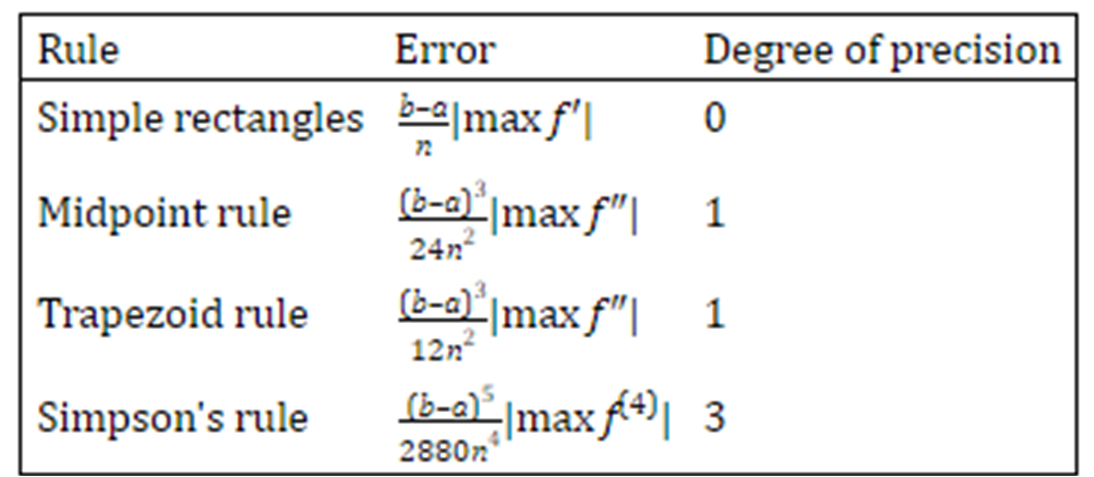

**Lagrange Interpolation**

Interpolated value at 2.750 is 0.382.


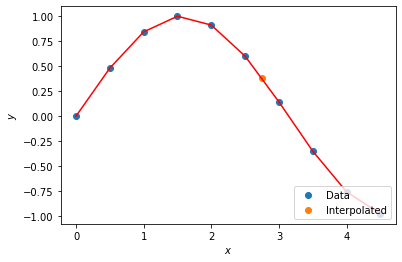

In [ ]:
#Lagrange Interpolation 
#Last update:Piyush
import numpy as np
import matplotlib.pyplot as plt
#x=[1,1.5,2,3.2,4.5]    #If you have a dataset
#y=[5,8.2,9.2,11,16]
N = 10
x = np.zeros((N))       #If you want a functional form
y = np.zeros((N))
for i in range(len(x)):
  a = i/2
  x[i]=a
  y[i]=np.sin(a)
#xp = float(input('Enter interpolation point: '))
xp = 2.75; yp = 0
for i in range(len(x)):
    prod = 1
    for j in range(len(x)):
      if i != j:
            prod = prod * (xp - x[j])/(x[i] - x[j])
    yp = yp + prod * y[i] 
print('Interpolated value at %.3f is %.3f.' % (xp, yp))
plt.scatter(x,y,label='Data')
plt.plot(x,y,linewidth=1.5,color='red')
plt.xlabel(r'$x$');plt.ylabel(r'$y$')
plt.scatter(xp,yp,label='Interpolated')
plt.legend(loc='lower right')

In [ ]:
# Last Update: Pranjal
# Lagarange Interpolation

import numpy as np
n = int(input('Enter number of data points: '))
x = np.zeros((n))
y = np.zeros((n))

print('Enter data for x and y: ')
for i in range(n):
    x[i] = float(input( 'x['+str(i)+']='))
    y[i] = float(input( 'y['+str(i)+']='))

xp = float(input('Enter interpolation point: '))
yp = 0
for i in range(n):
    
    p = 1
    
    for j in range(n):
        if i != j:
            p = p * (xp - x[j])/(x[i] - x[j])
    
    yp = yp + p * y[i]    
print('Interpolated value at %.3f is %.3f.' % (xp, yp))

Enter number of data points: 5,6


ValueError: ignored



```
\\Newton Forward Interpolation 
\\C code
\\Last update:Piyush

#include <iostream>
#include <math.h>
#include <stdio.h>
int main() 
{   
    int i,j,n;
    float x[20],y[20],xg,sum,prod=1,u,dy[20],h;
    printf("Enter number of subintervals");
    scanf("%d",&n);
    for(i=0;i<=n;i++)
    scanf("%f %f",&x[i],&y[i]);
    printf("Enter interpolating point x");
    scanf("%f",&xg);
    h=x[1]-x[0];
    u=(xg-x[0])/h;
    for(j=0;j<=n;j++) dy[j]=y[j];
    prod=1; sum=y[0];
    for(i=1;i<=n;i++)
    {
        for(j=0;j<=n-1;j++) 
        dy[j]=dy[j+1]-dy[j];
        prod*=(u-1+1)/i;
        sum+=prod*dy[0];
    }
printf("Result",xg,sum);
    return 0;
}
```



**Gauss-Seidel Iteration**

$$\begin{bmatrix}
27 &  6& -1\\ 
 6&  15& 2\\ 
 1&  1&  54
\end{bmatrix}\begin{bmatrix}
x\\ 
y\\ 
z
\end{bmatrix} =\begin{bmatrix}
54\\ 
72\\ 
110
\end{bmatrix}$$

In [ ]:
#Gauss Seidel Iteration 
#Last update:Piyush
N=5 #number of iterations
# 27x+6y-z=54
# 6x+15y+2z=72
# x+y+54z=110
x=0;y=0;z=0
for i in range(N):
  x = (1/27)*(54-6*y+z)
  y = (1/15)*(72-6*x-2*z)
  z = (1/54)*(110-x-y)
print('x',x)
print('y',y)
print('z',z)

x 1.1663468914798172
y 4.074797518245446
z 1.9399788072273099


*Jacobi Method*

1.0001185986914152 1.9997679470100358 -0.9998281428744763 0.9997859784600501


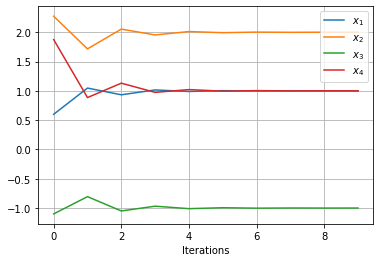

In [ ]:
#Jacobi's Method 
#Last update by Piyush #Nirmalya
import matplotlib.pyplot as plt
x1=0;x2=0;x3=0;x4=0
data_x1=[];data_x2=[];data_x3=[];data_x4=[]
for i in range (10):
    a=(6+x2-2*x3)/10
    b=(25+x1+x3-3*x4)/11
    c=(-11-2*x1+x2+x4)/10
    d=(15-3*x2+x3)/8
    x1=a;x2=b;x3=c;x4=d
    data_x1.append(x1);data_x2.append(x2);data_x3.append(x3);data_x4.append(x4)
print(x1,x2,x3,x4)
plt.plot (data_x1, label=r'$x_{1}$')
plt.plot (data_x2, label=r'$x_{2}$')
plt.plot (data_x3, label=r'$x_{3}$')
plt.plot (data_x4, label=r'$x_{4}$')
plt.xlabel('Iterations');plt.legend();plt.grid();plt.show()

Polynomial evaluation\
Let the equation be\
$$4x^6+9x^5+10x^4+7x^3+2x^2+3x+5$$

[how to do synthetic division](https://https://cs.fit.edu/~wds/classes/adm/Lectures/HornerPolynomial.pdf)

In [ ]:
#Last update Surabhi 
coefficient= [4,9,10,7,2,3,5]    #Enter coefficients of higher powers first
x=3
n= len(coefficient)
result=0
for i in range (0,n):
    result= coefficient[i]+ result*x
print(result)

6134


FORTRAN file line counter

In [ ]:
#Last update Piyush
N = 0
OPEN (1, file = 'data.txt')
DO
    READ (1,*, END=10)   #jab file end ho ga tab wo 10 pe chala jayega 
    N = N + 1
END DO
10 CLOSE (1)             # yah par aa jayega kud kar ke
print*,N                 #file ke andar ka content

In [ ]:
#Last update Piyush
#FORTRAN file counter and reader
#Kousik sir approved code
program hornerpoly
implicit none 
real,allocatable ::coeff(:),y(:)
integer::N,i,num

real :: x=3 
!counter gin bhai
N = 0
OPEN (1, file ='data.txt')
DO
    READ (1,*, END=10)
    N = N + 1
END DO
10 CLOSE (1)
print*,N   

allocate (coeff(N),y(N))  !allocate the arrays from the text file
!Reading the coefficients from the file

open (unit = 1, file ='data.txt', status ='old')
do i = 1,N 
     read (1,*) coeff(i)
end do
close (1)

#put your polynomial evaluation code here

end program hornerpoly

In [ ]:
#function generator

import numpy as np
a = 0
b = 5
N = 10
x=np.linspace(a,b,N)
def f(x):
  return x**2
for i in x:
    print(i,f(i), end = '\n ')

In [ ]:
import numpy as np
data=np.loadtxt('data.txt')  
coeff=data[0:] # reads the coefficients from the file
#x = int(input("Enter value of x:"))
n = len(coeff)-1    
y = np.zeros_like(coeff)
# put the rest of your polynomial evaluation code here


```
!FORTRAN Code for gauss elimination
!Last update Arpita
!not giving proper answers,modifications needed
program gauss_el
implicit none
integer::i,j,k,n,sum_a,sum_b
real::u
real,allocatable::element(:,:)
real,allocatable::x(:)
sum_b=0
write(*,*)"rank of matrix?"
read(*,*)n
allocate(element(n,n),x(n))
do i=1,n
   do j=1,(n+1)
        element(i,j)=i**2+j**2
   end do
end do  
do i=1,(n-1)
    do j=(i+1),n
         u=element(j,i)/element(i,i)
             do k=i,(n+1)
                  element(j,k)=element(j,k)-(u*element(i,k)) 
             end do
    end do
end do  
write(*,*)element        
do i=(n-1),1
    do j=(i+1),n
         sum_a=element(i,j)*x(j)
         sum_b=sum_b+sum_a
    end do
   x(i)=(element(i,n+1)-sum_b)/element(i,i)
end do
write(*,*)x
end program gauss_el
```



In [ ]:
#Last update Joy(jay)
#gauss elimination python
a =[[3,4,5,6],
    [4, 5, 7, 9],
     [2, 5, 6, 7]]

for i in range (1,3):
    u = a[i][0]/a[0][0]
    for j in range(0,4):
        a[i][j] = a[i][j]-u*a[0][j]
print(a)
u = a[2][1]/a[1][1]
for j in range(1,3):
        a[2][j] = a[2][j] - u*a[1][j]
print (a)

z = a[2][3]
print(z)
y = (a[1][3]-a[2][2]*z)/a[1][1]
print(y)
x = (a[0][3]-a[2][2]*z-a[1][1]*y)/a[0][0]
print(x)

[[3, 4, 5, 6], [0.0, -0.33333333333333304, 0.3333333333333339, 1.0], [0.0, 2.3333333333333335, 2.666666666666667, 3.0]]
[[3, 4, 5, 6], [0.0, -0.33333333333333304, 0.3333333333333339, 1.0], [0.0, 0.0, 5.000000000000007, 3.0]]
3.0
42.0000000000001
1.6666666666666667


Bisection Method (While loop)

In [ ]:
#Bisection with while loop
#Last update Surabhi
print("****BISECTION****")
def f(x):
  y = x**3+x**2+5*x+9
  return y
a= int(input('The upper limit'))
b= int(input('The lower limit'))
tol= float(input("The tolerance error of the root:"))
mid = (a+b)/2
if (f(a)*f(b)>0 or f(a)*f(b)==0):
  print("Root can't be calculated, Choose limits carefully next time")
if(f(a)*f(b)<0):
  while (abs(f(mid))>tol):
    mid = (a+b)/2
    if (f(a)*f(mid)<0):
      b=mid
    elif(f(b)*f(mid)<0):
      a=mid
    print("The root is:",mid)
print("The end")

In [ ]:
#Last update Rahul
#Days in a week
program ca_ase
! Write a program that reads an integer from the keyboard, and displays the day of the week corresponding to that integer.
! Be sure to handle the case of an illegal input value
    integer:: day
    print*,"Enter any number from (1 - 7)"
    read(*,*)day
    print*,"The day number",day,"of the week is"
    week: select case (day)
case (1)
    print*,"Sunday"
case(2)
    print*,"Monday"
case(3)
    print*,"Tuesday"
case(4)
    print*,"Wednesday"
case(5)
    print*,"Thursday"
case(6)
    print*,"Friday"
case(7)
    print*,"Saturday"
case default
    print*,"Entered  value is out of range"
end select week
end program ca_ase

# **Machine Learning**

*Neural Networks* 

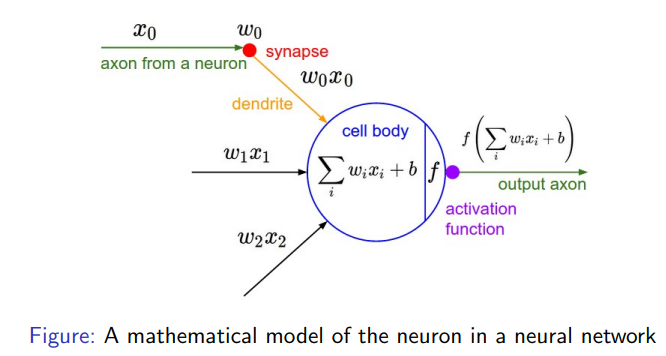

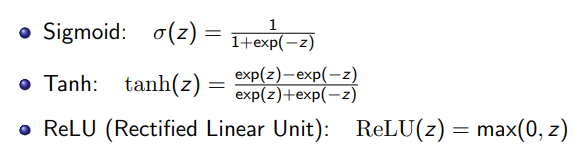

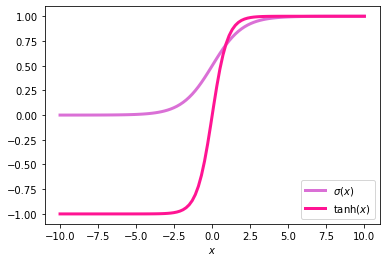

In [ ]:
#Correction required  8 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)  
def sigmoid(x):
  return 1/(1+np.exp(-x))
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
#def ReLU(x):      #correct this code for outputting ReLU function(Piyush)
#  if(x < 0):
#    return 0
#  else:
#    return np.abs(x)
plt.figure(figsize=(6,4))
plt.plot(x,sigmoid(x),linewidth=3.0,color='orchid',label=r'$\sigma(x)$')
plt.plot(x,tanh(x),linewidth=3.0,color='deeppink',label=r'$\tanh(x)$')
#plt.plot(x,ReLU(x),linewidth=3.0,color='mediumslateblue',label=r'$\ReLU(x)$')
plt.xlabel(r'$x$')
plt.legend(loc='lower right')

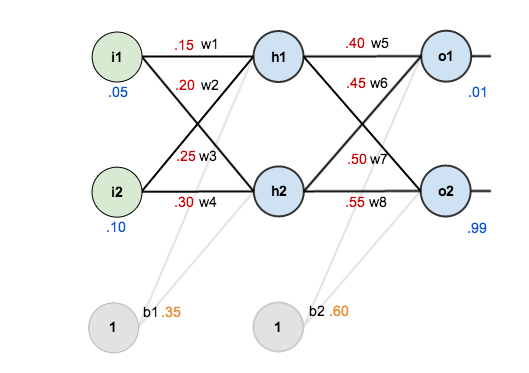

In [ ]:
#last update:Piyush
import numpy as np
import matplotlib.pyplot as plt
w=[0.15,0.20,0.25,0.30,0.40,0.45,0.50,0.55]  #weights
x=[0.05,0.10]                                #inputs
b=[0.35,0.60]                                #bias  
o=[0.01,0.99]
def sigmoid(x):          #activation function
  return 1/(1+np.exp(-x))
def neuron1(w,x):        #neuron1
  sum=0
  for i in range(len(x)):
    sum = sum + w[i]*x[i]  #accessing 1 and 2 elements of weights
  return sum+b[0] 
def neuron2(w,x):        #neuron2
  sum1=0
  for i in range(len(x)):
    sum1 = sum1 + w[i+2]*x[i] #accessing 3 and 4 elements of weights
  return sum1+b[0] 
#Input Layer
print('Input  H1',neuron1(w,x)) ; print('Input  H2',neuron2(w,x))
#Output for Hidden Layer
hidden_out=[]
a=sigmoid(neuron1(w,x)) ;  b=sigmoid(neuron2(w,x))
hidden_out.append(a)    ;   hidden_out.append(b)
print('Output H1',a)    ;   print('Output H2',b)

Input  H1 0.3775
Input  H2 0.39249999999999996
Output H1 0.5932699921071872
Output H2 0.596884378259767


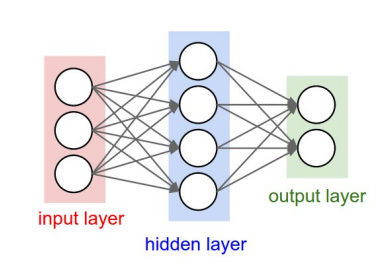

In [ ]:
#Output Layer
b=[0.35,0.60]                                #bias  
def outneuron1(w,x):        #hidden neuron1
  sum2=0
  for i in range(len(hidden_out)):
    sum2 = sum2 + w[i+4]*hidden_out[i] #accessing 5 and 6 elements of weights
  return sum2
def outneuron2(w,x):        #hidden neuron1
  sum3=0
  for i in range(len(hidden_out)):
    sum3 = sum3 + w[i+6]*hidden_out[i] #accessing 5 and 6 elements of weights
  return sum3
#Hidden Layer
print('Hidden layer')
print('Input 1  ',outneuron1(w,hidden_out)+b[1]) 
print('Input 2  ',outneuron2(w,hidden_out)+b[1])        
#Output Layer
print('Output O1',sigmoid(outneuron1(w,hidden_out)+b[1]))  
print('Output O2',sigmoid(outneuron2(w,hidden_out)+b[1])) 
Out=[]    #Result of neural network
Out.append(sigmoid(outneuron1(w,hidden_out)+b[1]))
Out.append(sigmoid(outneuron2(w,hidden_out)+b[1]))

Hidden layer
Input 1   1.10590596705977
Input 2   1.2249214040964653
Output O1 0.7513650695523157
Output O2 0.7729284653214625


In [ ]:
#Error calculation
o=[0.01,0.99]  # desired output
c1=0.5*((o[0]-Out[0])**2)
c2=0.5*((o[1]-Out[1])**2)
print('Error 1 =',c1)
print('Error 2 =',c2)
print('Total Error=',c1+c2)  #Total Ereor of neural network

Error 1 = 0.274811083176155
Error 2 = 0.023560025583847746
Total Error= 0.2983711087600027


In [ ]:
#Back propagation algorithm 
#Update : IN PROGRESS

**Clustering Algorithms**

*K-Means Clustering*

In [ ]:
#Last Update:Aditya
# CODE FOR KMeans CLUSTERING
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("TP_ML.csv") # reading our csv file
print(df.head())
#PLEASE PUT YOUR OWN CSV FILE HERE !
#THIS CSV FILE WON'T WORK HERE 

# SCATTER PLOT FOR THE UNSCALED DATA

plt.scatter(df['AGE'],df['INCOME($)']) #the scatter plot of our dataframe
plt.show()

In [ ]:
# RUNNING THE KMEANS ALGO
km = KMeans(n_clusters=3) # 1)randomly initializing the no of initial clusters based on the scatter plot to start of ML model
print(km.algorithm)
print(km.max_iter)
print(km.tol)# .algorithm, .max_iter, .tol gives the respective results

y_predicted = km.fit_predict(df[['AGE','INCOME($)']])  #the fit() fnc fits the dataset to thr ML model ,i.e., trains the model and the predict fnc predicts the outcomes by assigning the points to a specifc cluster
print(y_predicted)

df['Cluster'] = y_predicted
print(df.head())



df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
plt.scatter(df1.AGE,df1['INCOME($)'], color = 'red')
plt.scatter(df2.AGE,df2[' INCOME($)'], color = 'blue')
plt.scatter(df3.AGE,df3['INCOME($)'], color = 'green')

plt.xlabel('AGE')
plt.ylabel('INCOME($)')
plt.legend()
plt.show()'''

In [ ]:
# So in this plot the data is not scaled and so the KMeans fails to CLuster the values correctly
# we Use the MinMaxScaler fnc to scale the data and then fit that data into our original DataFrame and plot again
# we are going to scale the INCOME($) and AGE values here and then run the KMeans algorithm again and then plot it.
scaler = MinMaxScaler()
df[['INCOME($)', 'AGE']] = scaler.fit_transform(df[['INCOME($)','AGE']])
print(df)

In [ ]:
# SCATTER PLOT FOR OUR SCALED DATA

km = KMeans(n_clusters=3) # 1)randomly initializing the no of initial clusters based on the scatter plot to start of ML model
print(km.algorithm)
print(km.max_iter)
print(km.tol)# .algorithm, .max_iter, .tol gives the respective results

y_predicted = km.fit_predict(df[['AGE','INCOME($)']])  #the fit() fnc fits the dataset to thr ML model ,i.e., trains the model and the predict fnc predicts the outcomes by assigning the points to a specifc cluster
print(y_predicted)

df['Cluster'] = y_predicted
print(df.head())
print(km.cluster_centers_)

df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
plt.scatter(df1.AGE,df1['INCOME($)'], color = 'red')
plt.scatter(df2.AGE,df2['INCOME($)'], color = 'blue')
plt.scatter(df3.AGE,df3['INCOME($)'], color = 'green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color= 'black', marker= '*', label = 'centroid')
plt.xlabel('AGE')
plt.ylabel('INCOME($)')
plt.legend()
plt.show()

In [ ]:
# THE SSE CALCULATION AND VISUALISATION:
cluster_range = range(1,10)
sse = [] # initialising an empty array
for i in cluster_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['AGE', 'INCOME($)']])
    sse.append(km.inertia_)
print(sse)

plt.xlabel(cluster_range)
plt.ylabel(sse)
plt.ylabel('SSE')
plt.plot(cluster_range,sse)
plt.show()

outlier detection(z-score)

In [ ]:
#last update Nirmalya
import numpy as np
data = [1, 2, 3, 2, 1, 100, 1, 2, 3, 2, 1]
threshold = 3
mean = np.mean(data)
std = np.std(data)
z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print ('Mean of dataset',mean)
print ('std. deviation',std)
print ('z score outlier',z_score_outlier)

Mean of dataset 10.727272727272727
std. deviation 28.239530349851172
z score outlier [100]


LOF

In [ ]:
#last update Nirmalya
from sklearn.neighbors import LocalOutlierFactor
data = [[1, 1], [2, 2.1], [1, 2], [2, 1], [50, 35], [2, 1.5]]
lof = LocalOutlierFactor(n_neighbors=2, metric='manhattan')
prediction = lof.fit_predict(data)
print(prediction)

[ 1  1  1  1 -1  1]


Boxplot

Thus the array becomes[ 2 11  6  4 17 15  6 19 10 14  5 15 14 12 14  9 14 11  1 14  3 10 17 18
 13  8  2  3 12  9 27 30]


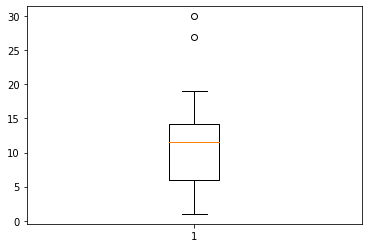

<Figure size 720x504 with 0 Axes>

In [ ]:
#last update Nirmalya
# Adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# random integers between 1 to 20
arr = np.random.randint(1, 20, size=30)

# two outliers taken
arr1 = np.append(arr,[27,30])

print('Thus the array becomes{}'.format(arr1))
plt.boxplot(arr1)
fig = plt.figure(figsize =(10, 7))
plt.show()

iqr 8.25 upper_bound 26.625 lower_bound -6.375
The following are the outliers in the boxplot:[27 30]


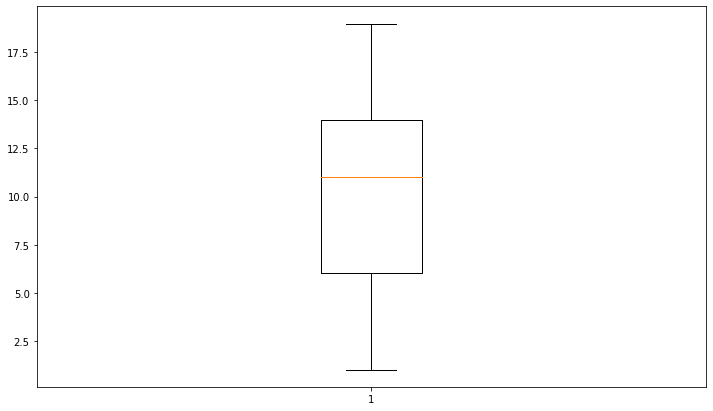

In [ ]:
#last update Nirmalya
# finding the 1st quartile
q1 = np.quantile(arr1, 0.25)

# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)

# finding the iqr 
iqr = q3-q1

# upper and lower bound
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr',iqr,'upper_bound', upper_bound,'lower_bound', lower_bound)
outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
# boxplot 
arr2 = arr1[(arr1 >= lower_bound) & (arr1 <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()

In [ ]:
#Last Update: Pranjal
#SVM Python code from scratch 

import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# **Electronic Structure Theory**

ORCA Manual\
https://www.orcasoftware.de/tutorials_orca/first_steps/first_calc.html

Thermochemistry in GAUSSIAN \
https://www.cup.uni-muenchen.de/ch/compchem/G98thermo.pdf

$$ \left[ -\sum_i \frac{\nabla_i^{2}}{2} -\sum_A \frac{\nabla_A^{2}}{2} - \sum_{A,i}\frac{Z_{A}}{r_{Ai}}+\sum_{A>B}\frac{Z_A Z_B}{R_{AB}}+\sum_{i>j}\frac{1}{r_{ij}}\right]\Psi(\boldsymbol{r};\boldsymbol{R})=E\Psi(\boldsymbol{r};\boldsymbol{R}) $$


$$ \left[\hat{T}_e(\boldsymbol{r}) +\hat{T}_N(\boldsymbol{R}) +\hat{V} _{eN}(\boldsymbol{r};\boldsymbol{R})+\hat{V}_{NN}(\boldsymbol{R})+\hat{V}_{ee}(\boldsymbol{r})\right]\Psi(\boldsymbol{r};\boldsymbol{R})=E\Psi(\boldsymbol{r};\boldsymbol{R})
$$

*Born Oppenheimer Approximation*
$$ \left[ \hat{T}_e(\boldsymbol{r})+ \hat{V} _{eN}(\boldsymbol{r};\boldsymbol{R})+\hat{V}_{ee}(\boldsymbol{r})\right]\Psi(\boldsymbol{r})=E_{el}\Psi(\boldsymbol{r}) $$


Hartree -Fock Equation
$$\left( \mathscr{H}^{CORE} + \sum_j \left[ 2\mathscr{J}_j - \mathscr{K}_j\right]   \right)\psi_i(\boldsymbol{r}_i) = \sum_j \epsilon_{ij}\psi_i(\boldsymbol{r}_i)
 $$


$$  \mathscr{H}^{CORE} = -\sum_i \frac{\nabla_i^{2}}{2}- \sum_{A,i}\frac{Z_{A}}{r_{Ai}}
$$

***Coulomb Operator***
$$ \mathscr{J}_j =  \int \psi_j(\boldsymbol{r}_j)^* \frac{1}{r_{i,j}}\psi_j(\boldsymbol{r}_j) dr
 $$

***Exchange Operator***
$$ \mathscr{K}_j\psi_i(\boldsymbol{r}_i) =  \left[\int \psi_j(\boldsymbol{r}_j)^* \frac{1}{r_{i,j}}\psi_i(\boldsymbol{r}_i)dr\right]\psi_j(\boldsymbol{r}_j)
 $$

$$H_{2} \:\: molecule$$

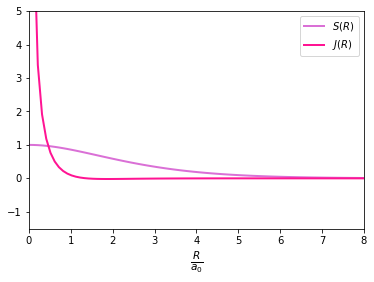

In [ ]:
#Last update:Piyush
#VB treatment of H2 molecule
import numpy as np
import matplotlib.pyplot as plt
r=np.linspace(0.01,10,100)
def J(r):
  return np.exp(-2*r)*((1/r)+(5/8)-(3/4)*r-(r**2/6))
def S(r):
  return np.exp(-r)*((1/3)*r**2+r+1)
plt.ylim([-1.5,5]) 
plt.xlim([0,8])
plt.plot(r,S(r),color='orchid',linewidth=2.0,label=r'$S(R)$')
plt.plot(r,J(r),color='deeppink',linewidth=2.0,label=r'$J(R)$')
plt.xlabel(r'$\frac{R}{a_{0}}$',fontsize=15); #plt.ylabel(r'$\frac{E}{H}$',fontsize=20)
plt.legend(loc='upper right')

In [ ]:
#Last update Piyush

if file looks like this

                   # HF #DFT #MP2
sto-3g  -74.9607025097376 -75.3100134333185 -74.9956471419271
3-21g   -75.5858099786415 -75.9715022779598 -75.7062158312667


#gnuplot commands to plot bar graph
set style data histogram
set style fill solid
set boxwidth 0.7
plot 'filename.txt' u 2:xtic(1) title'HF' lc rgb 'red'


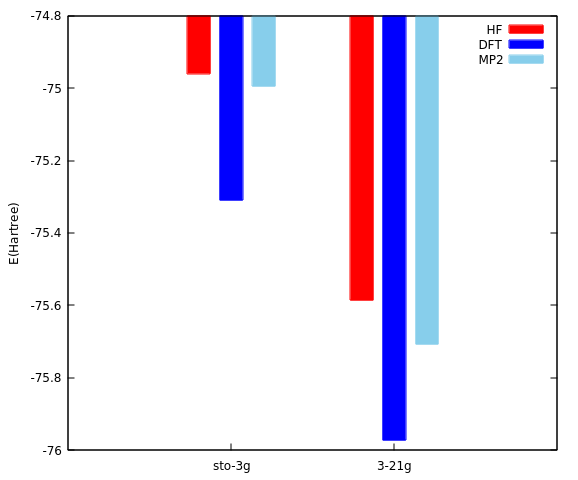

# **Astrophysics**

## Stellar Structure 

$$\color{Cyan}{Hydrostatic\:equilibrium} $$
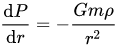


$$\color{Pink}{Mass\:\:continuity}$$
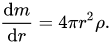

$$\color{yellow}{Energy\:\:generation}$$
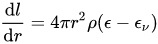

$$\color{Orange}{Radiative\:energy\: transport}$$
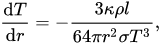

$$\color{Orchid}{Convective\:Transport}$$
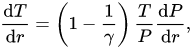

```
#Last update by Piyush
#Euler implementation of Stellar structure
# MATLAB
for i = 2:n
 rho(i) = P(i)* miu *mp/(k*T(i));
 opaH(i) = (1.1*10^(-25)*0.02^(0.5)*rho(i)^0.5*T(i)^0.5);
 opae(i) = (0.2*(1+0.71)*(1+2.7*10^11*rho(i)/(T(i)^2))^-1*(1+ (T(i) / 4.5*10^8)^0.86)^(-1));
 opak(i) = (4*10^25*(1+0.71)*(0.02+0.001)*rho(i)/(T(i)^3.5));
 opa(i) = opam + (opaH(i)^(-1) + ( opae(i) + opak(i) )^(-1))^(-1);
 r(i+1) = r(i) + h;
 P(i+1) = P(i) - h*G*M(i)*rho(i)/(r(i)^2);
 M(i+1) = M(i) + h*4*pi*r(i)^2*rho(i);
 T(i+1) = T(i) - h*3*opa(i)*rho(i)*L(i)/(64*pi*sig*r(i)^2*T(i)^3);
 L(i+1) = L(i) + h*4*pi*r(i)^2*rho(i)*con*T(i)^4;
end
    rho(n+1) = P(n+1)* miu *mp/(k*T(n+1));
```



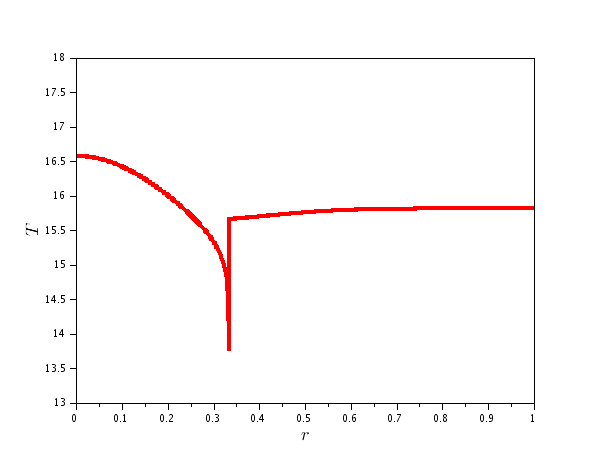

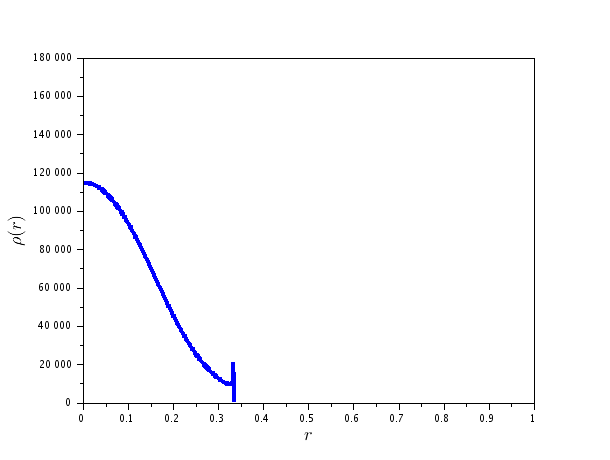

**Blackbody Spectrum**

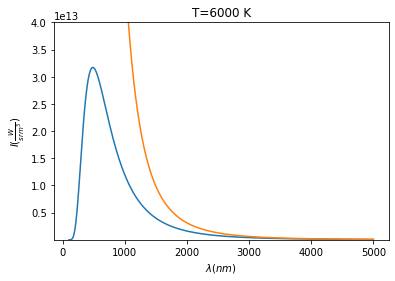

In [ ]:
#Last update by Piyush
import numpy as np
import matplotlib.pyplot as plt
wavelength_nm = np.linspace(100,5000,1000)
wavelength_m  = wavelength_nm*1e-9
h=6.626e-34; c=3.0e+8;  k=1.38e-23;  T=6000 #
#def Planck
a=2.0*h*c**2
b=h*c/(wavelength_m*k*T)
black_body_intensity= a/ ((wavelength_m**5)*(np.exp(b)-1.0))
# return a/ ((wavelength_m**5)*(np.exp(b)-1.0))
RJ_intensity = 2*c*k*T/wavelength_m**4
plt.plot(wavelength_nm,black_body_intensity)
plt.plot(wavelength_nm,RJ_intensity)
plt.ylim(1e8,0.4e14)
plt.xlabel(r'$\lambda (nm)$')
plt.ylabel(r'$I(\frac{W}{sr m^3})$')
plt.title('T=6000 K')
plt.show()

**Fourier Transform**

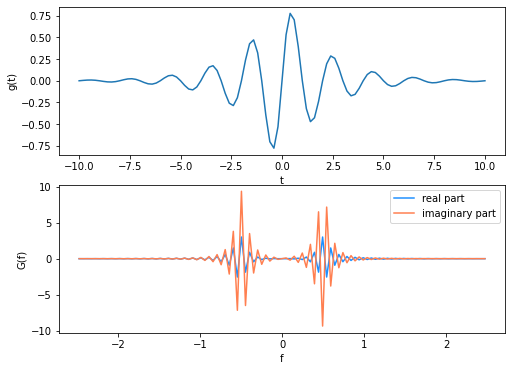

In [ ]:
#Last update Piyush
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

width = 2.0
freq = 0.5

t = np.linspace(-10, 10, 101)   # linearly space time array
g = np.exp(-np.abs(t)/width) * np.sin(2.0*np.pi*freq*t)

dt = t[1]-t[0]       # increment between times in time array

G = fftpack.fft(g)   # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f)     # shift frequencies from min to max
G = fftpack.fftshift(G)     # shift G order to coorespond to f

fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')

ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')

plt.show()

#Atomic and Molecular Spectroscopy

```
#FORTRAN CODE
#Last update Piyush
module vaseline
    implicit none
contains
    real function wavelu(n1,n2)
        real, intent(in) :: n1,n2
        real,parameter :: uR_h=912E-10 !1/R= 912 Angstrom
        wavelu = (1/((1/(n1**2))-(1/(n2**2))))*uR_h
    end function 
end module vaseline

program bohrmodel
   #Piyush 21msphcp02
   use vaseline
   real :: n1,n2
   n1 =1 ; n2 =2
   a = wavelu(n1,n2)
   print*,"Energy levels"
   print*,"n1=",int(n1),"n2=",int(n2)
   print*,"Wavelength =",a,"m"
   print*,"Frequency  =",(3E+8/a),"Hz"
end program bohrmodel
```



<Figure size 360x144 with 0 Axes>

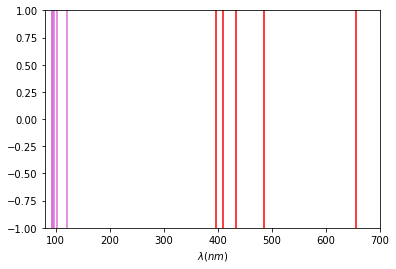

<Figure size 360x144 with 0 Axes>

In [ ]:
#Last Update:Piyush
import matplotlib.pyplot as plt
import numpy as np
code_Ly=[121.600010,102.599998 ,97.2800080,95.0000043,93.8057170,93.1000059]  #data from my code Lyman  transition
code_Ba=[656.639997,486.400040,434.285710,410.399991,397.226671]              #data from my code Balmer transition

Balmer=[656.279 ,486.135,434.0472,410.1734,397.0075]
Lyman=[121.56701,102.57220,97.253650,94.974287,93.780331,93.0748142]


plt.xlim([80,700])
plt.ylim([-1,1])
plt.xlabel(r'$\lambda(nm)$')

for i in range(len(code_Ly)):
  plt.axvline(x=code_Ly[i],color='Orchid')
  #plt.axvline(x=Lyman[i],color='blue')

for i in range(len(code_Ba)):
  plt.axvline(x=code_Ba[i],color='Red')
plt.figure(figsize=(5,2))


In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
plt.rcParams.update({'figure.max_open_warning': 0})
N = 10
xs = []
ys = []
zs = []
for i in range(0,N+1):
    for j in range(0,N+1):
        for k in range(0,N+1):
            xs.append(i)
            ys.append(j)
            zs.append(k)
print(len(xs))
#fig = plt.figure(figsize=(15,15))
#ax = plt.axes(projection='3d')
#ax.scatter3D(xs, ys, zs, color='Black')
#plt.show()

27


# Statistical Mechanics

Text(0, 0.5, '$\\bar{n}$')

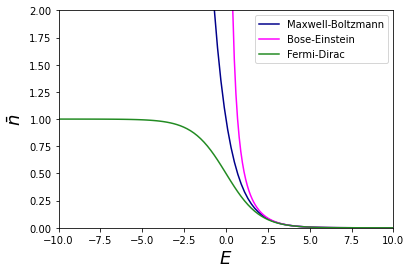

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
kt=1.0
x = np.linspace(-10,10,100);
x1 = np.linspace(0.4,10,100);
F = 1.0/(np.exp(x/kt)+1);
B = 1.0/(np.exp(x1/kt)-1);
M = np.exp(-x/kt);

plt.plot(x,M,label='Maxwell-Boltzmann',color='darkblue')
plt.plot(x1,B,label='Bose-Einstein',color='fuchsia')
plt.plot(x,F,label='Fermi-Dirac',color='forestgreen')
plt.legend()
plt.ylim([0,2])
plt.xlim([-10,10])
plt.xlabel(r'$E$',fontsize=18);
plt.ylabel(r'$\bar{n}$',fontsize=18)

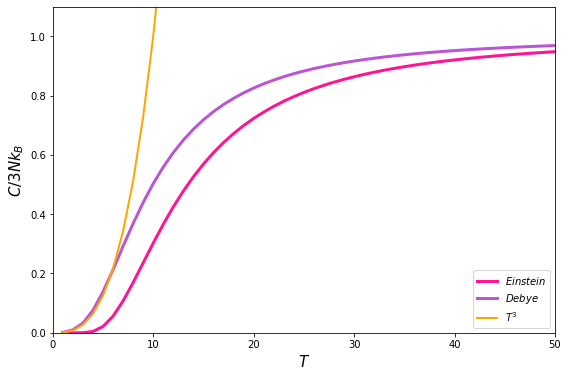

In [ ]:
# The Heat capacities but after they went to art class
from scipy.integrate import quad   # For quad integration
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

#Temperatures
T=np.linspace(1,100, 100)
T_e=np.float_(40.10)      #Einstein Temperature
T_d=np.float_(40.00)       #Debye Temperature

def Dulong(T):
    return [1]*len(T)    #Dulong Petit Law C_v=3NK_B;
                         #Normalised it so this is 1.
        
def Einstein(T,T_e):     #Einstein Function
    return ((T_e/T)**2)*(np.exp(T_e/T)/(np.exp(T_e/T)-1)**2)

#Defining the function for the integral in Debye function
def thatintegralindebye(x):
    return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)    
    #Defining the function for the integral part in Debye Function

#Using scipy to integrate the integral and evaluating Debye
def Debye(T,T_d):  
    deby=list()
    for t in T:
        deby.append(3*((t/T_d)**3) *np.float_(quad(thatintegralindebye,0,T_d/t)[0]))
    return (np.array(deby))

plt.figure(figsize=(9, 6))
plt.plot( T, Einstein(T,T_e), linewidth=3,label='$Einstein$',color='deeppink')
#plt.plot( T, Dulong(T), linewidth=3,label='$Dulong-Petit$',color='darkturquoise')
plt.plot( T, Debye(T,T_d),linewidth=3, label='$Debye$',color='mediumorchid')
plt.plot( T,(1e-3)*T**3,label='$T^{3} $',lw=2,color='orange')
#plt.plot( T,100*T**(-2)*np.exp(-(1/T)),label='$T^{2}e^{-1/T} $')
#plt.axvline(x=T_e,label='$T_e$',color='skyblue')
#plt.axvline(x=T_d,label='$T_d$',color='limegreen')
plt.xlim([0,50])
plt.ylim([0,1.1])
plt.xlabel("$T$",fontsize=15)
plt.ylabel("$C/3N k_B$",fontsize=15)
plt.legend(loc='lower right')
plt.show()

**Monte Carlo Integration**

3.148


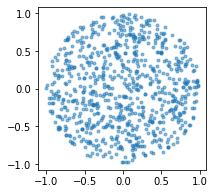

In [ ]:
#Last update Piyush
import numpy
import matplotlib.pyplot as plt
#plt.style.use("bmh")
#%config InlineBackend.figure_formats=["png"]
N = 10_00
inside = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside.append((x, y))
plt.figure(figsize=(3, 3))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker=".", alpha=0.5);
pi=4 * len(inside)/float(N)  
print(pi)     

In [ ]:
4 * len(inside)/float(N)

3.208

#SQL

In [ ]:
SELECT * FROM Customers;
SELECT CustomerName, City FROM Customers;
SELECT DISTINCT Country FROM Customers;
SELECT COUNT(DISTINCT Country) FROM Customers;

SELECT column1, column2, ...
FROM table_name
WHERE condition;

SELECT * FROM Customers
WHERE Country='Mexico';

SELECT * FROM Customers
WHERE CustomerID=1;

SELECT * FROM Customers
WHERE Country='Germany' AND City='Berlin';
WHERE City='Berlin' OR City='München';
WHERE NOT Country='Germany';

SELECT * FROM Customers
ORDER BY Country DESC;

SELECT * FROM Customers
ORDER BY Country ASC, CustomerName DESC;

INSERT INTO Customers (CustomerName, City, Country)
VALUES ('Cardinal', 'Stavanger', 'Norway');

SELECT CustomerName, ContactName, Address
FROM Customers
WHERE Address IS NOT NULL;

#The following SQL statement updates the first customer (CustomerID = 1) 
#with a new contact person and a new city.
UPDATE Customers
SET ContactName = 'Alfred Schmidt', City= 'Frankfurt'
WHERE CustomerID = 1;

UPDATE Customers
SET ContactName='Juan'
WHERE Country='Mexico';

DELETE FROM Customers WHERE CustomerName='Alfreds Futterkiste';

#delete all rows
DELETE FROM Customers;


SyntaxError: ignored

In [ ]:
CREATE TABLE Class(
  ID int PRIMARY KEY,
  Name varchar(40),
  Dept varchar(50),
  Age int,
  Marks int,
  CHECK(Age >= 18)
  );

  INSERT INTO Class(ID,Name,Dept,Age,Marks)
VALUES(3,'Aditya','DCS',25,33)



SyntaxError: ignored

#ORCA

https://pc2.uni-paderborn.de/fileadmin/pc2/events/2020-02-10_Winterschool/Pantazis_DFT-BasisSets.pdf

In [ ]:
water MD_simulation

In [ ]:
! MD BLYP D3 def2-SVP
%md
  initvel 300_K
  timestep 0.5_fs
  thermostat berendsen 300_K timecon 10.0_fs
  dump position stride 1 filename "trajectory.xyz"
  run 2000
end
* xyz 0 1
O    -2.03740    -1.21799    -0.08342
H    -1.06493    -1.04408    -0.02285
H    -2.37327    -1.07034     0.83692
O    -1.65042     1.84243     0.07893
H    -0.72656     1.49786    -0.01029
H    -2.07086     1.65422    -0.79802
*


In [ ]:
orca water_md.inp > water_md.out&

In [ ]:

            |  Sim. Time |  t_SCF | t_Grad |     Temp |     E_Kin |         E_Pot |         E_Tot |      Cons.Qty |   Drift
       Step |       [fs] |    [s] |    [s] |      [K] | [Hartree] |     [Hartree] |     [Hartree] |     [Hartree] |     [K]
------------|------------|--------|--------|----------|-----------|---------------|---------------|---------------|-----------
          0          0.0      4.6              300.00    0.008550     -152.681936     -152.673385                          
          1          0.5      0.9      1.4     301.10    0.008582     -152.682084     -152.673503     -152.673501      0.00
          2          1.0      0.9      0.4     302.85    0.008631     -152.682140     -152.673508     -152.673502     -0.02
          3          1.5      0.7      0.5     300.94    0.008577     -152.682085     -152.673508     -152.673501      0.00
          4          2.0      0.8      0.4     296.58    0.008453     -152.681953     -152.673500     -152.673497      0.06
          5          2.5      0.7      0.5     292.08    0.008325     -152.681809     -152.673485     -152.673494      0.12
          6          3.0      0.7      0.4     289.34    0.008246     -152.681716     -152.673469     -152.673495      0.11
          7          3.5      0.8      0.5     288.51    0.008223     -152.681679     -152.673456     -152.673499      0.03
          8          4.0      0.8      0.4     287.99    0.008208     -152.681651     -152.673443     -152.673504     -0.04
          9          4.5      0.7      0.4     285.84    0.008147     -152.681569     -152.673422     -152.673505     -0.06
         10          5.0      0.7      0.4     281.56    0.008025     -152.681417     -152.673392     -152.673502     -0.01
         11          5.5      0.9      0.5     276.67    0.007886     -152.681238     -152.673353     -152.673497      0.06

In [ ]:
Trajectory.xyz
# ORCA AIMD Position Step 1999, t=999.50 fs, E_Pot=-152.69032111 Hartree, Unit is Angstrom
 O      2.0534005624     -8.2623792796     -0.9835586406
 H      1.9715145209     -7.4148625255     -1.4860833778
 H      1.5214883715     -8.8974809112     -1.4816931329
 O      1.5473215478     -5.6166580780     -1.2746029773
 H      0.8126357434     -6.0793101938     -0.8051446635
 H      2.2303285446     -5.6711363797     -0.5364491991
6
# ORCA AIMD Position Step 2000, t=1000.00 fs, E_Pot=-152.69038489 Hartree, Unit is Angstrom
 O      2.0551493763     -8.2643936889     -0.9845953328
 H      1.9827004811     -7.4193121542     -1.4929523126
 H      1.5170957005     -8.9060283361     -1.4742143395
 O      1.5490261614     -5.6213873808     -1.2750521345
 H      0.8234393271     -6.0901133799     -0.8046421243
 H      2.2245320505     -5.6747651633     -0.5347653049

# Solid State Physics

In [ ]:
#simpson 3/8
PROGRAM simpsimp38
IMPLICIT NONE
INTEGER::j,n
REAL::a,b,h,I,f

a=0;b=1;n=100

h=(b-a)/n
I=f(a)+f(b)
DO j=1,n-1
  IF (MOD(j,3)==0) THEN
    I=I+(2*f(a+(j*h)))
  ELSE
    I=I+(3*f(a+(j*h)))
  END IF
END DO
I=(3/8.)*h*I

WRITE(6,9) "I=",I
9 FORMAT (a,F9.6)
END PROGRAM

REAL function f(x1)
  f=x1**2
return
end function